In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv('Train_ULAK.csv').dropna()
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,68855579,10,6,1038,11595,346,0,103.800000,167.133879,...,32,998.0000,0.0000,998,998,6.830000e+07,0.0000,68300000,68300000,DoS Hulk
1,53,196,2,2,70,174,35,35,35.000000,0.000000,...,32,0.0000,0.0000,0,0,0.000000e+00,0.0000,0,0,BENIGN
2,123,118,2,2,96,96,48,48,48.000000,0.000000,...,20,0.0000,0.0000,0,0,0.000000e+00,0.0000,0,0,BENIGN
3,80,295657,7,10,1114,15841,1084,0,159.142857,407.829796,...,20,0.0000,0.0000,0,0,0.000000e+00,0.0000,0,0,BENIGN
4,80,15705351,7,5,407,452,377,0,58.142857,140.620563,...,20,360718.0000,0.0000,360718,360718,9.767208e+06,0.0000,9767208,9767208,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783351,41272,98689782,8,5,11595,327,5792,0,1449.375000,2046.673464,...,32,13859.0000,0.0000,13859,13859,9.860000e+07,0.0000,98600000,98600000,BENIGN
1783352,443,90956783,63,77,1041,135313,373,0,16.523810,68.018939,...,32,198255.7778,362537.3486,1165022,77291,9.908053e+06,290822.6482,10000000,9132848,BENIGN
1783353,443,1241813,3,3,0,0,0,0,0.000000,0.000000,...,28,0.0000,0.0000,0,0,0.000000e+00,0.0000,0,0,BENIGN
1783354,53,71509,2,2,78,330,39,39,39.000000,0.000000,...,32,0.0000,0.0000,0,0,0.000000e+00,0.0000,0,0,BENIGN


In [27]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [3]:
## Let's see if some assumption based on domain knowlwdge hold
# For this reason, let's split by label to start
gb=df.groupby(' Label')
dfs = [gb.get_group(x) for x in gb.groups]

In [4]:
import numpy as np
# This will let us know how to associate each group with a label
labels_per_group = [np.unique(df[[' Label']]) for df in dfs]
labels_per_group

[array(['BENIGN'], dtype=object),
 array(['Bot'], dtype=object),
 array(['DDoS'], dtype=object),
 array(['DoS GoldenEye'], dtype=object),
 array(['DoS Hulk'], dtype=object),
 array(['DoS Slowhttptest'], dtype=object),
 array(['DoS slowloris'], dtype=object),
 array(['FTP-Patator'], dtype=object),
 array(['Heartbleed'], dtype=object),
 array(['Infiltration'], dtype=object),
 array(['PortScan'], dtype=object),
 array(['SSH-Patator'], dtype=object),
 array(['Web Attack � Brute Force'], dtype=object),
 array(['Web Attack � Sql Injection'], dtype=object),
 array(['Web Attack � XSS'], dtype=object)]

# Level 1 filtering, the type of attack can only happen on particular destination port

## Let's check if web attacks happen only on ports 80 and 443

In [5]:
# Confirm the indeces for web attacks
labels_per_group[12:]

[array(['Web Attack � Brute Force'], dtype=object),
 array(['Web Attack � Sql Injection'], dtype=object),
 array(['Web Attack � XSS'], dtype=object)]

In [6]:
# In the training set only port 80 shows up
[np.unique(df[[' Destination Port']]) for df in dfs[12:]]

[array([80]), array([80]), array([80])]

## Lets check that SSH_Patator only happens on port 22

In [7]:
# Confirm the indeces for SSH-Patator
labels_per_group[11]

array(['SSH-Patator'], dtype=object)

In [8]:
# In the training set only port 22 shows up
[np.unique(df[[' Destination Port']]) for df in dfs[11:12]]

[array([22])]

## Let's check the FTP-Patator only happens on port 21

In [9]:
# Confirm the indeces for FTP-Patator
labels_per_group[7]

array(['FTP-Patator'], dtype=object)

In [10]:
# In the training set only port 21 shows up
[np.unique(df[[' Destination Port']]) for df in dfs[7:8]]

[array([21])]

# Let's start on Level 2 filter

## See how well the following rule works: 

BENIGN: Normal traffic

if ['Destination Port'] in [80, 443] and ['Flow Duration'] < threshold:
    return 'BENIGN'

In [11]:
# Confirm the indeces for Benign
labels_per_group[0]

array(['BENIGN'], dtype=object)

In [12]:
bdf = dfs[0]

In [13]:
p80fd = bdf[bdf[' Destination Port'] == 80][[' Flow Duration']]

In [14]:
p80fd.mean()

 Flow Duration    2.764066e+07
dtype: float64

In [15]:
p80fd.max()

 Flow Duration    119999979
dtype: int64

In [16]:
p80fd.std()

 Flow Duration    4.324591e+07
dtype: float64

In [18]:
np80=dfs[1:]
np80fd = [df[df[' Destination Port'] == 80][' Flow Duration'] for df in np80]

In [19]:
[df.mean() for df in np80fd]

[nan,
 17073736.94560649,
 23386412.162399754,
 57345934.07025991,
 57551770.44659353,
 57075233.23938647,
 nan,
 nan,
 nan,
 739167.1764705882,
 nan,
 6638958.354056902,
 2513092.8333333335,
 7001995.16097561]

In [20]:
[df.max() for df in np80fd]

[nan,
 103941558,
 119311937,
 119611868,
 119800736,
 119046064,
 nan,
 nan,
 nan,
 9605093,
 nan,
 35451960,
 5086516,
 70203058]

In [21]:
[df.std() for df in np80fd]

[nan,
 31142536.391154718,
 27532239.30393215,
 45965072.766122654,
 36274513.68910278,
 49442828.4695022,
 nan,
 nan,
 nan,
 1930486.2004055232,
 nan,
 6637697.083727899,
 2624856.174791534,
 10491313.551777482]

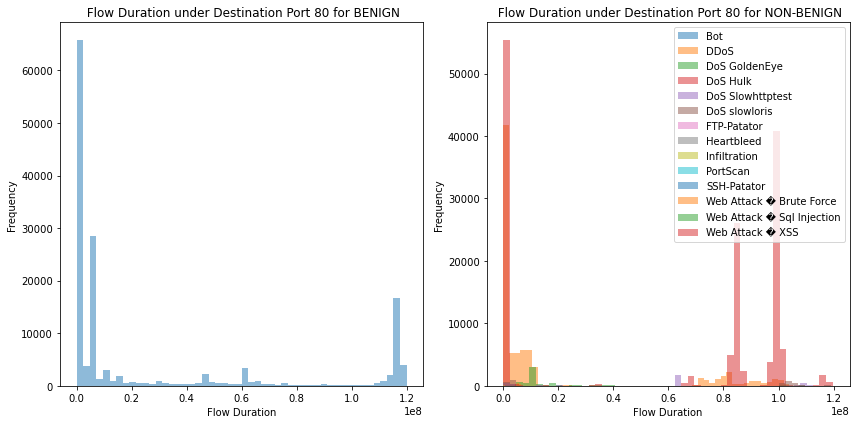

In [31]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting for 'BENIGN'
plt.subplot(1, 2, 1)
plt.hist(p80fd[' Flow Duration'], bins=50, alpha=0.5, label='BENIGN')  # Note that p80fd is a DataFrame with one column
plt.title(' Flow Duration under Destination Port 80 for BENIGN')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')

# Plotting for non-'BENIGN'
plt.subplot(1, 2, 2)
for i, df in enumerate(np80fd):  # np80fd is a list of Series
    plt.hist(df, bins=50, alpha=0.5, label=labels_per_group[i+1])  # assuming labels_per_group[0] is 'BENIGN'
plt.title(' Flow Duration under Destination Port 80 for NON-BENIGN')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Incomplete Data: Many non-BENIGN classes have nan as their statistics, which might indicate a lack of samples. In such cases, the heuristic might be even more prone to errors.

Port Limitation: Using only ports 80 and 443 might ignore many other kinds of benign traffic that don't use these ports.

Suggestions for Machine Learning Model:
Random Forest
Argument: Random Forests handle high dimensionality and feature interaction well, making them an excellent choice for complex datasets with mixed types of variables. They also provide feature importance metrics, which can be valuable for interpretability.
Based on Statistics: The statistics show a high level of variability among features. Random Forest can capture these without assuming any underlying data distribution.


## See how well the following rule works: 

Dos Hulk

if ['Fwd Packet Length Max'] > threshold and ['Flow Packets/s'] > threshold:
    return 'DoS Hulk'


In [22]:
# Confirm the indeces for DoS Hulk
labels_per_group[2]

array(['DDoS'], dtype=object)

In [23]:
ddosdf= dfs[2]

In [24]:
ddosdf[[' Fwd Packet Length Max']].mean()

 Fwd Packet Length Max    14.932256
dtype: float64

In [25]:
ddosdf[[' Fwd Packet Length Max']].max()

 Fwd Packet Length Max    20
dtype: int64

In [26]:
ddosdf[[' Fwd Packet Length Max']].std()

 Fwd Packet Length Max    6.728072
dtype: float64

In [28]:
# Assuming dfs is your list of DataFrames, each representing a different label
# And labels_per_group contains the mapping index to label name

# Confirm the indices for 'DoS Hulk'
hulk_index = labels_per_group.index('DoS Hulk')
print(f"'DoS Hulk' is at index {hulk_index} in labels_per_group")

# Extract 'DoS Hulk' DataFrame
hulk_df = dfs[hulk_index]

# Filter based on your conditions and calculate the statistics for 'Fwd Packet Length Max'
fwd_pkt_max_hulk = hulk_df[' Fwd Packet Length Max']
print("Statistics for 'Fwd Packet Length Max' under 'DoS Hulk'")
print(f"Mean: {fwd_pkt_max_hulk.mean()}")
print(f"Max: {fwd_pkt_max_hulk.max()}")
print(f"Std: {fwd_pkt_max_hulk.std()}")

# Filter based on your conditions and calculate the statistics for 'Flow Packets/s'
flow_pkts_per_s_hulk = hulk_df[' Flow Packets/s']
print("Statistics for 'Flow Packets/s' under 'DoS Hulk'")
print(f"Mean: {flow_pkts_per_s_hulk.mean()}")
print(f"Max: {flow_pkts_per_s_hulk.max()}")
print(f"Std: {flow_pkts_per_s_hulk.std()}")

# For Non-'DoS Hulk' (assuming dfs[0] is 'BENIGN' and others are various types of attacks)
non_hulk_dfs = [df for i, df in enumerate(dfs) if i != hulk_index]
non_hulk_fwd_pkt_max = [df[' Fwd Packet Length Max'] for df in non_hulk_dfs]
non_hulk_flow_pkts_per_s = [df[' Flow Packets/s'] for df in non_hulk_dfs]

# Stats for Non-'DoS Hulk'
print("Statistics for Non-'DoS Hulk'")
print("For 'Fwd Packet Length Max'")
print(f"Mean: {[df.mean() for df in non_hulk_fwd_pkt_max]}")
print(f"Max: {[df.max() for df in non_hulk_fwd_pkt_max]}")
print(f"Std: {[df.std() for df in non_hulk_fwd_pkt_max]}")

print("For 'Flow Packets/s'")
print(f"Mean: {[df.mean() for df in non_hulk_flow_pkts_per_s]}")
print(f"Max: {[df.max() for df in non_hulk_flow_pkts_per_s]}")
print(f"Std: {[df.std() for df in non_hulk_flow_pkts_per_s]}")


'DoS Hulk' is at index 4 in labels_per_group
Statistics for 'Fwd Packet Length Max' under 'DoS Hulk'
Mean: 233.66139223043814
Max: 423
Std: 164.22856224473418
Statistics for 'Flow Packets/s' under 'DoS Hulk'
Mean: 180836.96619294072
Max: 3000000.0
Std: 442867.0566047085
Statistics for Non-'DoS Hulk'
For 'Fwd Packet Length Max'
Mean: [230.6553349304018, 408.7205169628433, 14.932255504860146, 311.76727328809375, 235.63481524249423, 94.67981374965763, 18.9382, 5309.333333333333, 1023.1363636363636, 1.0695330836454433, 323.50242326332796, 54.9072708113804, 277.6666666666667, 22.28048780487805]
Max: [24820, 23360, 20, 791, 1983, 410, 49, 5792, 1460, 397, 1432, 602, 600, 585]
Std: [791.7018215043946, 2271.518192395181, 6.728071781624097, 199.62902808262837, 427.33344976254864, 111.5918255736925, 5.572198007799761, 747.7439847077786, 409.2625534572369, 3.629565217016018, 321.0237363319064, 165.9429831921441, 290.95120907225333, 110.90248523831782]
For 'Flow Packets/s'
Mean: [inf, inf, inf, 8.

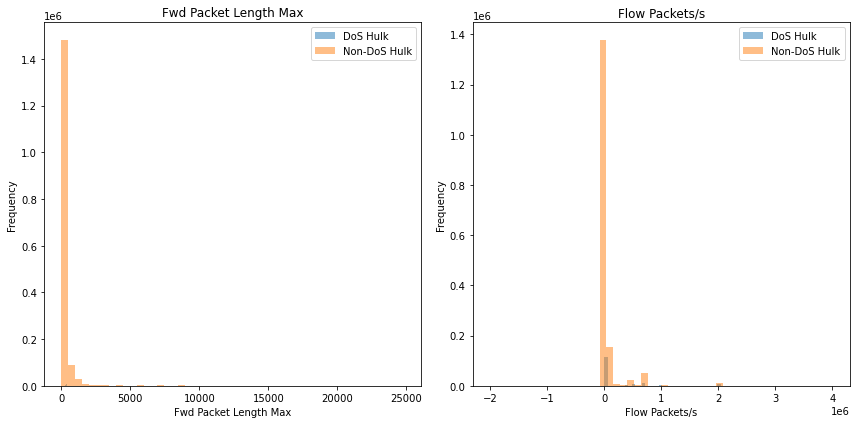

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming fwd_pkt_max_hulk and non_hulk_fwd_pkt_max are your dataframes or series
# You can replace them with your actual dataframes or series

# Remove NaN and inf values
def remove_invalid_entries(df):
    return df.replace([np.inf, -np.inf], np.nan).dropna()

# Check if dataframe is empty
def is_empty(df):
    return df.empty

# Fwd Packet Length Max
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if not is_empty(fwd_pkt_max_hulk):
    fwd_pkt_max_hulk = remove_invalid_entries(fwd_pkt_max_hulk)
    plt.hist(fwd_pkt_max_hulk, bins=50, alpha=0.5, label='DoS Hulk')

non_hulk_concatenated = pd.concat(non_hulk_fwd_pkt_max)
if not is_empty(non_hulk_concatenated):
    non_hulk_concatenated = remove_invalid_entries(non_hulk_concatenated)
    plt.hist(non_hulk_concatenated, bins=50, alpha=0.5, label='Non-DoS Hulk')

plt.title('Fwd Packet Length Max')
plt.xlabel('Fwd Packet Length Max')
plt.ylabel('Frequency')
plt.legend()

# Flow Packets/s
plt.subplot(1, 2, 2)
if not is_empty(flow_pkts_per_s_hulk):
    flow_pkts_per_s_hulk = remove_invalid_entries(flow_pkts_per_s_hulk)
    plt.hist(flow_pkts_per_s_hulk, bins=50, alpha=0.5, label='DoS Hulk')

non_hulk_flow_concatenated = pd.concat(non_hulk_flow_pkts_per_s)
if not is_empty(non_hulk_flow_concatenated):
    non_hulk_flow_concatenated = remove_invalid_entries(non_hulk_flow_concatenated)
    plt.hist(non_hulk_flow_concatenated, bins=50, alpha=0.5, label='Non-DoS Hulk')

plt.title('Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


When dealing with network traffic data to identify types of network activity (e.g., benign vs. malicious like 'DoS Hulk'), various machine learning models can be employed. Below are some commonly used models, the rationale for using them, and considerations based on the statistics you provided.

Decision Trees (e.g., CART, Random Forest)
Rationale:

Easy to interpret and understand, making it possible to understand which features are the most important for classification.
Can handle both numerical and categorical variables.
Resistant to outliers due to the nature of binary splitting.
Evaluation:

Given the high variability in your data (Std values), decision trees could be a good choice as they are less affected by outliers.
Decision trees may automatically "threshold" important features, essentially achieving what your heuristic aimed to do but in a more data-driven manner.

## See how well the following rule works

DDoS

if ['Flow Packets/s'] > threshold and ['Total Fwd Packets'] > threshold:
    return 'DDoS'


In [32]:
# Assuming dfs is your list of DataFrames, each representing a different label
# And labels_per_group contains the mapping index to label name

# Find the index for 'DDoS'
ddos_index = labels_per_group.index('DDoS')
print(f"'DDoS' is at index {ddos_index} in labels_per_group")

# Extract the 'DDoS' DataFrame
ddos_df = dfs[ddos_index]

# Filter based on your conditions and calculate the statistics for 'Flow Packets/s'
flow_pkts_per_s_ddos = ddos_df[' Flow Packets/s']
print("Statistics for 'Flow Packets/s' under 'DDoS'")
print(f"Mean: {flow_pkts_per_s_ddos.mean()}")
print(f"Max: {flow_pkts_per_s_ddos.max()}")
print(f"Std: {flow_pkts_per_s_ddos.std()}")

# Filter based on your conditions and calculate the statistics for 'Total Fwd Packets'
total_fwd_pkts_ddos = ddos_df[' Total Fwd Packets']
print("Statistics for 'Total Fwd Packets' under 'DDoS'")
print(f"Mean: {total_fwd_pkts_ddos.mean()}")
print(f"Max: {total_fwd_pkts_ddos.max()}")
print(f"Std: {total_fwd_pkts_ddos.std()}")

# For Non-'DDoS' (assuming dfs[0] is 'BENIGN' and others are various types of attacks)
non_ddos_dfs = [df for i, df in enumerate(dfs) if i != ddos_index]
non_ddos_flow_pkts_per_s = [df[' Flow Packets/s'] for df in non_ddos_dfs]
non_ddos_total_fwd_pkts = [df[' Total Fwd Packets'] for df in non_ddos_dfs]

# Stats for Non-'DDoS'
print("Statistics for Non-'DDoS'")
print("For 'Flow Packets/s'")
print(f"Mean: {[df.mean() for df in non_ddos_flow_pkts_per_s]}")
print(f"Max: {[df.max() for df in non_ddos_flow_pkts_per_s]}")
print(f"Std: {[df.std() for df in non_ddos_flow_pkts_per_s]}")

print("For 'Total Fwd Packets'")
print(f"Mean: {[df.mean() for df in non_ddos_total_fwd_pkts]}")
print(f"Max: {[df.max() for df in non_ddos_total_fwd_pkts]}")
print(f"Std: {[df.std() for df in non_ddos_total_fwd_pkts]}")


'DDoS' is at index 2 in labels_per_group
Statistics for 'Flow Packets/s' under 'DDoS'
Mean: inf
Max: inf
Std: nan
Statistics for 'Total Fwd Packets' under 'DDoS'
Mean: 4.474087482642333
Max: 9
Std: 1.9010806216679734
Statistics for Non-'DDoS'
For 'Flow Packets/s'
Mean: [inf, inf, 8.766088353706508, 180836.96619294072, 23251.01982243956, 4560.215782197244, inf, 40.804294023333334, 4559.661403568456, inf, 15474.71827859442, 3420.6611078147344, 16077.049383143416, 2321.9606358469073]
Max: [inf, inf, 2587.322122, 3000000.0, 2000000.0, 1000000.0, inf, 41.28755526, 100000.0, inf, 2000000.0, 100000.0, 47619.04762, 500000.0]
Std: [nan, nan, 108.58675607550104, 442867.0566047085, 143601.1144500906, 23513.993162326606, nan, 0.37550953740010956, 21316.909862043114, nan, 38161.28610535299, 12306.471362662376, 18646.474134614415, 26662.582794585607]
For 'Total Fwd Packets'
Mean: [10.572043386250778, 3.2132471728594507, 5.878161628624306, 5.295635139609314, 5.723729792147806, 6.3566146261298275, 5.4

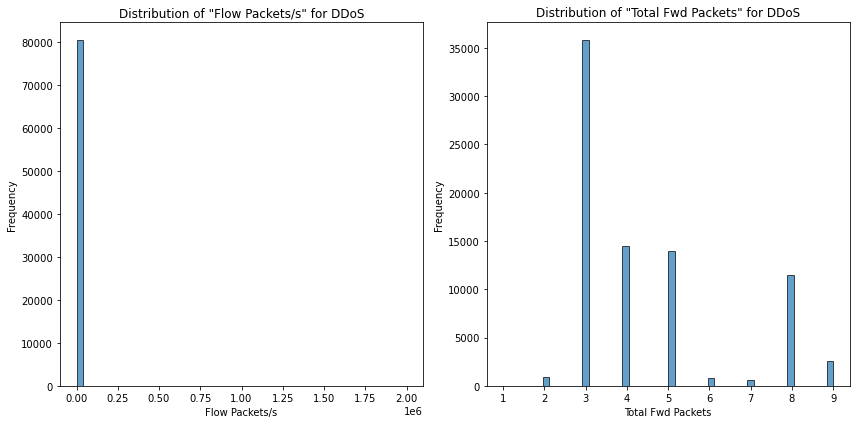

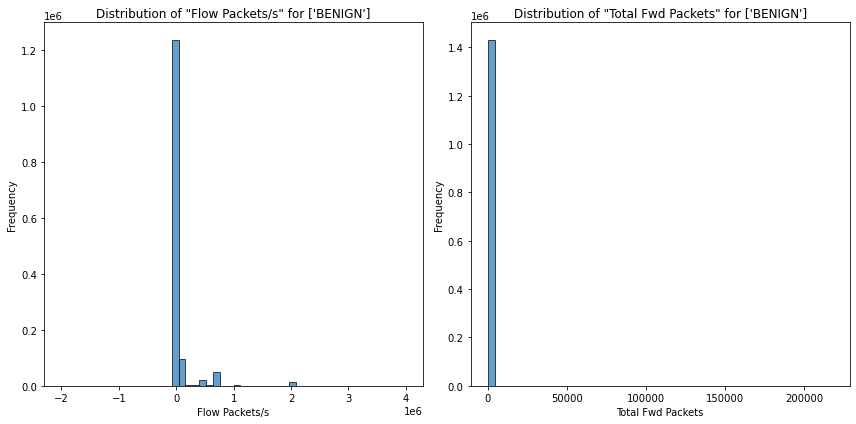

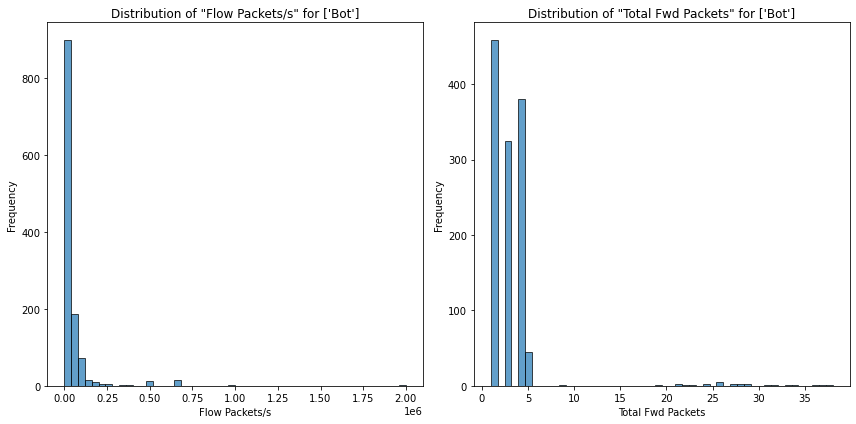

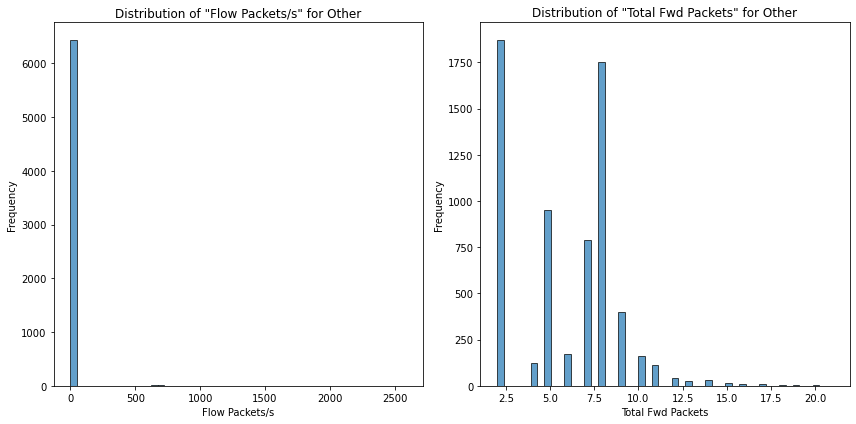

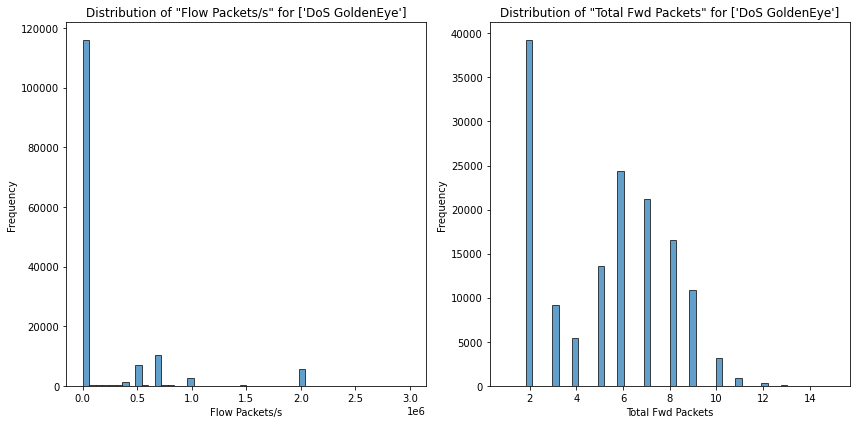

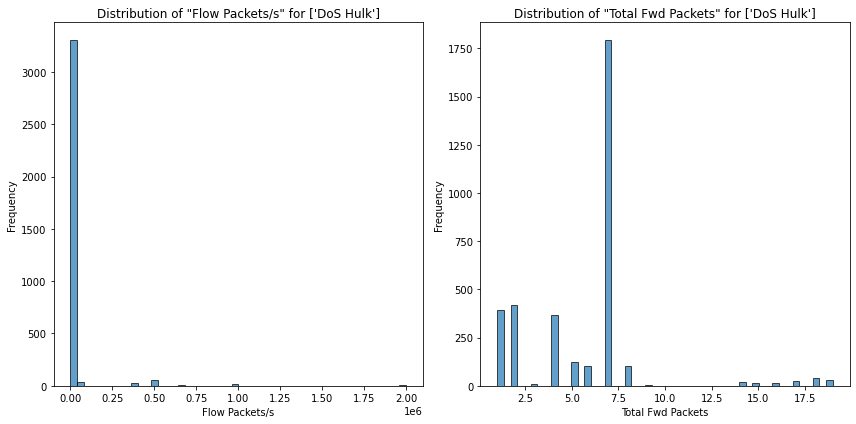

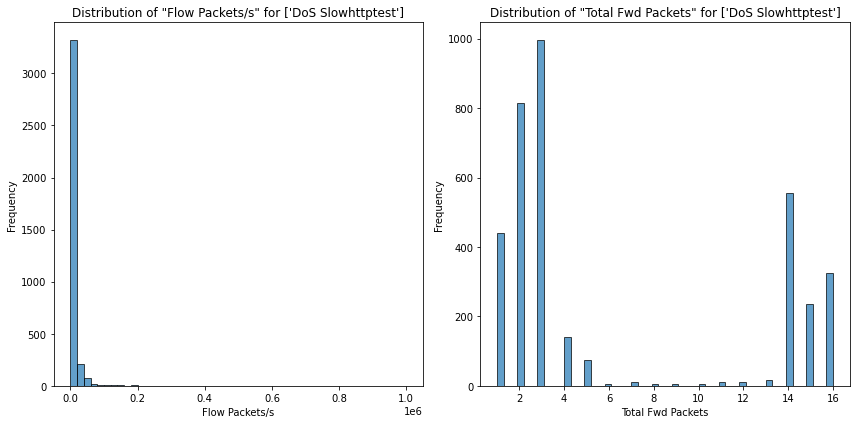

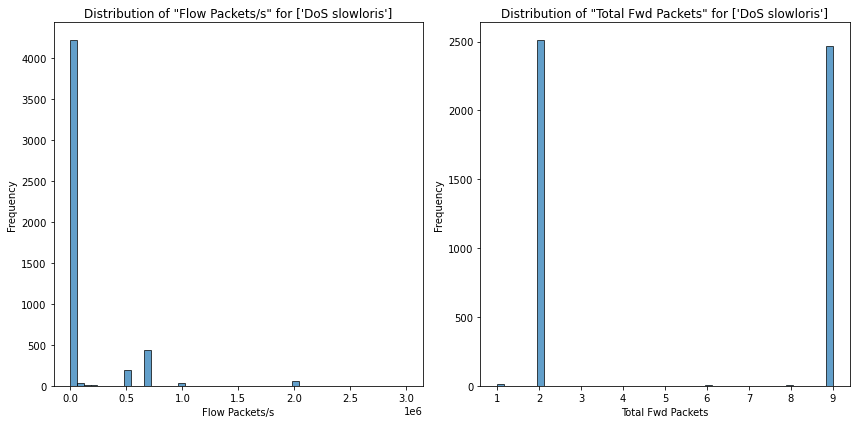

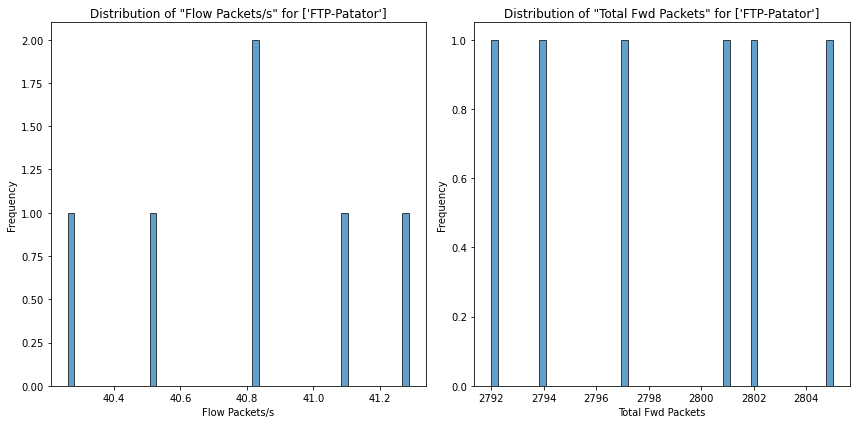

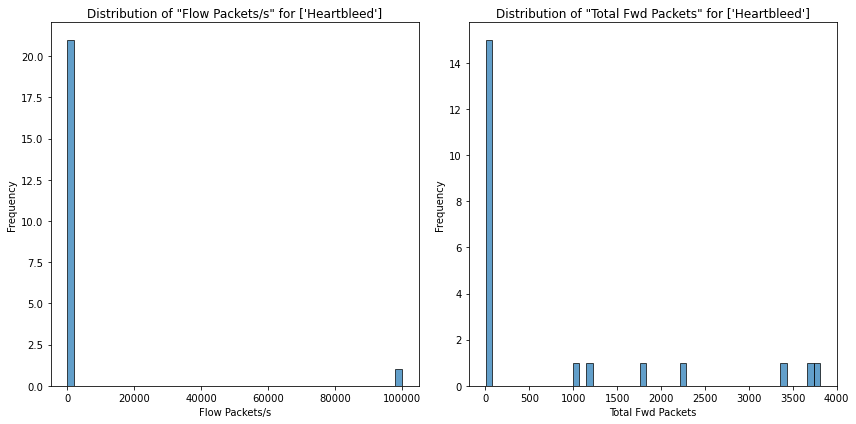

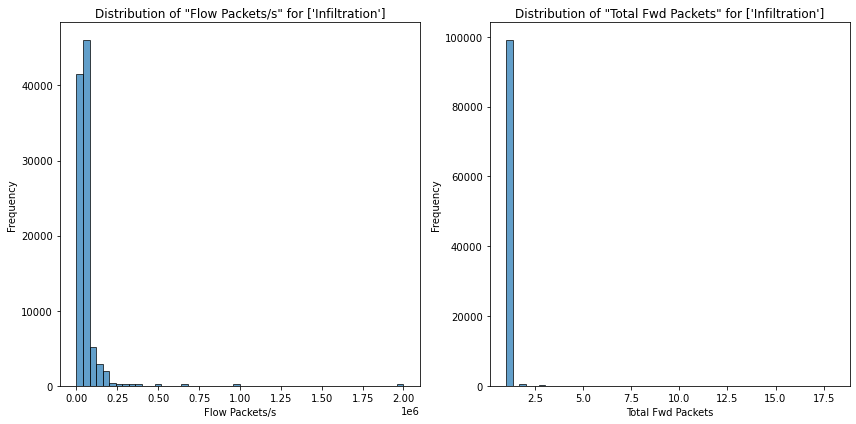

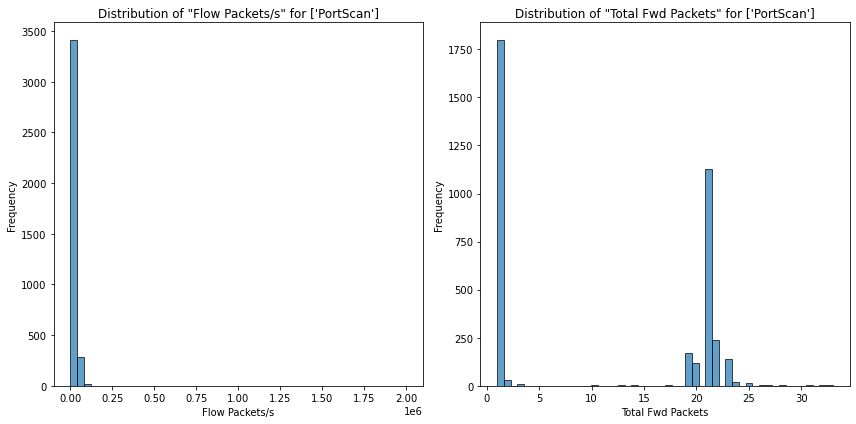

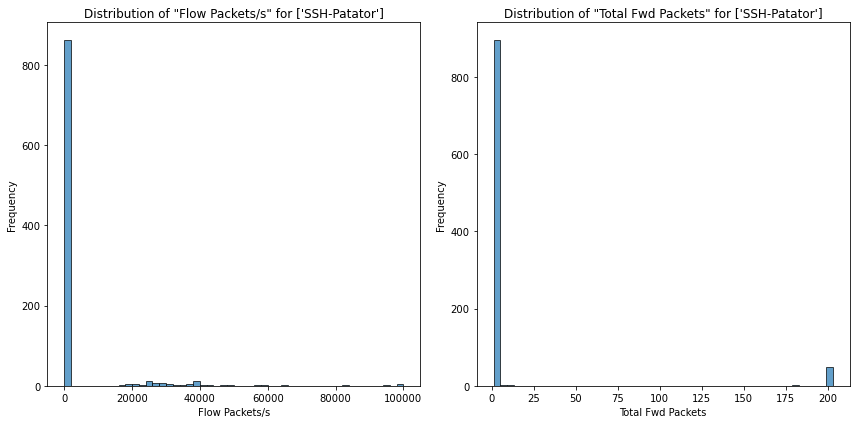

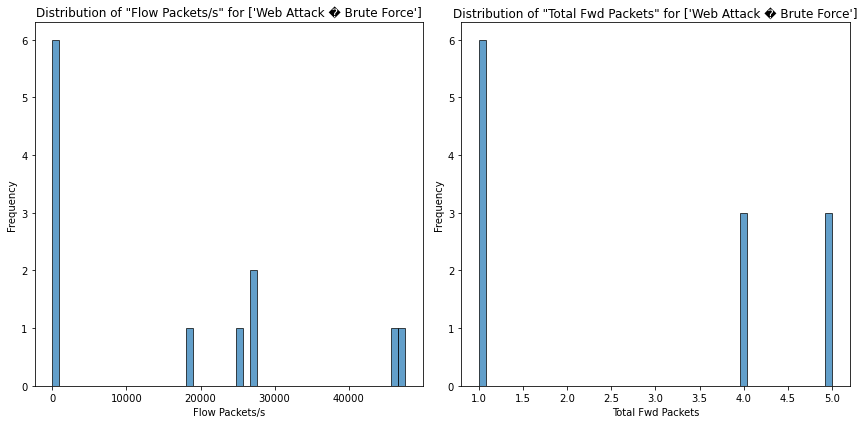

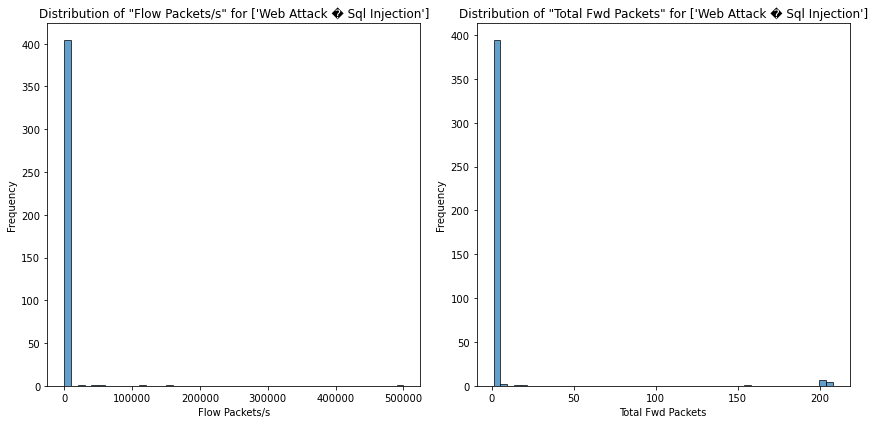

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(data, title, xlabel, ylabel):
    finite_data = data[np.isfinite(data)]
    if len(finite_data) > 0:
        plt.hist(finite_data, bins=50, edgecolor='black', alpha=0.7)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        plt.text(0.5, 0.5, 'No finite data to display', horizontalalignment='center')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_histogram(ddos_df[' Flow Packets/s'], 'Distribution of "Flow Packets/s" for DDoS', 'Flow Packets/s', 'Frequency')

plt.subplot(1, 2, 2)
plot_histogram(ddos_df[' Total Fwd Packets'], 'Distribution of "Total Fwd Packets" for DDoS', 'Total Fwd Packets', 'Frequency')

plt.tight_layout()
plt.show()

# For Non-'DDoS'
for i, df in enumerate(non_ddos_dfs):
    label = labels_per_group[i] if i != ddos_index else "Other"

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_histogram(df[' Flow Packets/s'], f'Distribution of "Flow Packets/s" for {label}', 'Flow Packets/s', 'Frequency')

    plt.subplot(1, 2, 2)
    plot_histogram(df[' Total Fwd Packets'], f'Distribution of "Total Fwd Packets" for {label}', 'Total Fwd Packets', 'Frequency')

    plt.tight_layout()
    plt.show()


Evaluation of Heuristic
Given the output statistics, here are some observations:

'Flow Packets/s' under 'DDoS': The mean and max values are inf, and the standard deviation is nan. This suggests that there might be some anomalies or extreme values in your data. You should investigate these extreme or infinite values to understand what's causing this. Without addressing these, using this feature as part of a heuristic might not be very reliable.

'Total Fwd Packets' under 'DDoS': The mean is approximately 4.47, the maximum is 9, and the standard deviation is approximately 1.90. This suggests that for 'DDoS' attacks, this metric could serve as a distinguishing factor.

Non-'DDoS' Statistics: For 'Flow Packets/s', the mean, max, and standard deviation vary widely for non-DDoS traffic. For 'Total Fwd Packets', the mean, max, and standard deviation are also different but less varied compared to 'Flow Packets/s'.

The heuristic if ['Flow Packets/s'] > threshold and ['Total Fwd Packets'] > threshold: return 'DDoS' is problematic due to the following reasons:

Data Anomalies: You'd need to resolve why 'Flow Packets/s' under 'DDoS' are inf. If there are outliers, they could distort your heuristic.

Overlap: Even if we exclude 'DDoS', the values of 'Flow Packets/s' and 'Total Fwd Packets' for non-DDoS labels vary widely and overlap with potential 'DDoS' values, making it hard to choose a "threshold" that cleanly separates 'DDoS' from non-'DDoS' traffic.

Machine Learning Models
Given the variability in your data, machine learning models are a better choice than heuristics for this kind of problem. Here are some suggestions prioritized by likely effectiveness:

1.Random Forest Classifier

Why: Random Forests are good with high dimensionality and can capture complex relationships in the data. They also offer feature importance scores, helping you understand which features are most relevant.

2.Gradient Boosting Machine (e.g., XGBoost)

Why: Similar to Random Forests but generally more powerful, they can capture non-linear relationships and are robust to outliers. They are also good for imbalanced classification problems, which might be the case here.

3.Support Vector Machine (SVM) with RBF Kernel

Why: Effective for high-dimensional spaces and also capable of modeling non-linear decision boundaries. However, they might be computationally expensive for large datasets.

## See how well the following rule works

PortScan: Scanning multiple ports to find an open port.
if ['Destination Port'] > threshold and ['Fwd IAT Max'] < threshold:
    return 'PortScan'



In [38]:
# Import pandas if not imported
import pandas as pd

# Assuming dfs is your list of DataFrames, each representing a different label
# And labels_per_group contains the mapping index to label name

# Find the index for 'PortScan'
portscan_index = labels_per_group.index('PortScan')
print(f"'PortScan' is at index {portscan_index} in labels_per_group")

# Extract the 'PortScan' DataFrame
portscan_df = dfs[portscan_index]

# Filter based on your conditions and calculate the statistics for ' Destination Port'
dest_port_portscan = portscan_df[' Destination Port']
print("Statistics for ' Destination Port' under 'PortScan'")
print(f"Mean: {dest_port_portscan.mean()}")
print(f"Max: {dest_port_portscan.max()}")
print(f"Std: {dest_port_portscan.std()}")

# Filter based on your conditions and calculate the statistics for ' Fwd IAT Max'
fwd_iat_max_portscan = portscan_df[' Fwd IAT Max']
print("Statistics for ' Fwd IAT Max' under 'PortScan'")
print(f"Mean: {fwd_iat_max_portscan.mean()}")
print(f"Max: {fwd_iat_max_portscan.max()}")
print(f"Std: {fwd_iat_max_portscan.std()}")

# For Non-'PortScan'
non_portscan_dfs = [df for i, df in enumerate(dfs) if i != portscan_index]
non_portscan_dest_port = [df[' Destination Port'] for df in non_portscan_dfs]
non_portscan_fwd_iat_max = [df[' Fwd IAT Max'] for df in non_portscan_dfs]

# Stats for Non-'PortScan'
print("Statistics for Non-'PortScan'")
print("For ' Destination Port'")
print(f"Mean: {[df.mean() for df in non_portscan_dest_port]}")
print(f"Max: {[df.max() for df in non_portscan_dest_port]}")
print(f"Std: {[df.std() for df in non_portscan_dest_port]}")

print("For ' Fwd IAT Max'")
print(f"Mean: {[df.mean() for df in non_portscan_fwd_iat_max]}")
print(f"Max: {[df.max() for df in non_portscan_fwd_iat_max]}")
print(f"Std: {[df.std() for df in non_portscan_fwd_iat_max]}")


'PortScan' is at index 10 in labels_per_group
Statistics for ' Destination Port' under 'PortScan'
Mean: 8629.93484144819
Max: 65389
Std: 13475.6892963097
Statistics for ' Fwd IAT Max' under 'PortScan'
Mean: 76093.77281398252
Max: 119000000
Std: 2204307.9588743844
Statistics for Non-'PortScan'
For ' Destination Port'
Mean: [9407.82391272463, 17560.41114701131, 81.94824935528665, 80.0, 80.0, 80.0, 80.0, 21.0, 444.0, 444.0, 22.0, 80.0, 80.0, 80.0]
Max: [65534, 53938, 64873, 80, 80, 80, 80, 21, 444, 444, 22, 80, 80, 80]
Std: [19745.242209782715, 19017.78880711812, 336.9055571454257, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
For ' Fwd IAT Max'
Mean: [4325915.816910301, 176186.23909531502, 15634986.690153243, 19463654.40592227, 56942576.161081836, 38896295.66657044, 40636917.30621748, 1585949.2694, 1163159.0, 37363899.5, 1225405.5102315564, 4760417.766069547, 843593.1666666666, 5126719.743902439]
Max: [120000000, 10200000, 101000000, 119000000, 118000000, 110000000, 119000000, 3

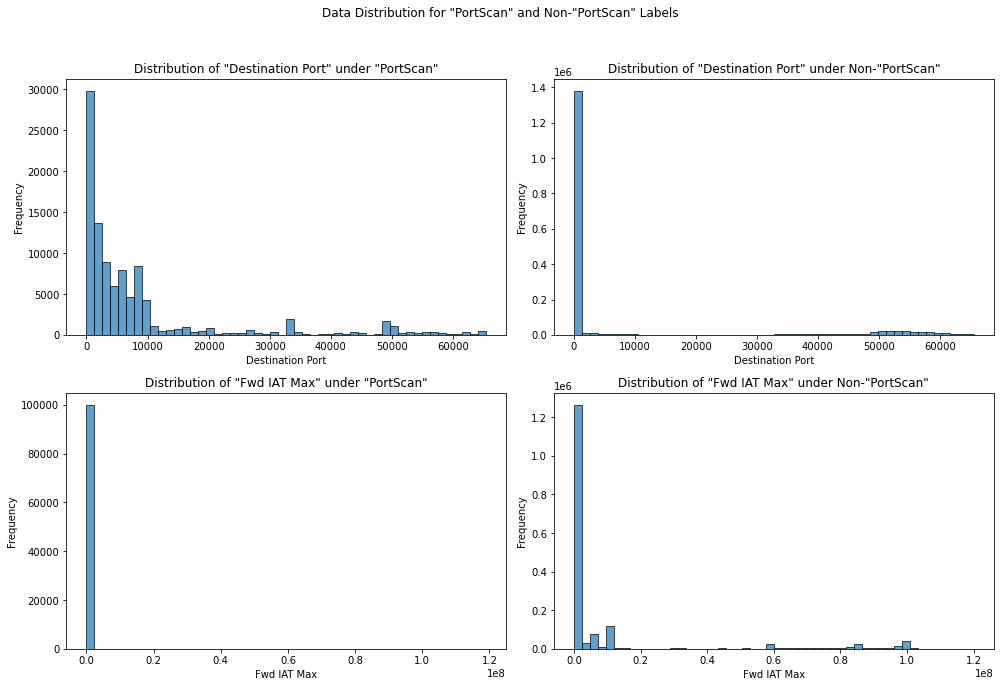

In [39]:
# Import matplotlib if not imported
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Data Distribution for "PortScan" and Non-"PortScan" Labels')

# Plot for ' Destination Port' under 'PortScan'
axs[0, 0].hist(dest_port_portscan, bins=50, edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Distribution of "Destination Port" under "PortScan"')
axs[0, 0].set_xlabel('Destination Port')
axs[0, 0].set_ylabel('Frequency')

# Plot for ' Destination Port' under Non-'PortScan'
# Concatenate all dataframes into one for this variable
all_non_portscan_dest_port = pd.concat(non_portscan_dest_port)
axs[0, 1].hist(all_non_portscan_dest_port, bins=50, edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Distribution of "Destination Port" under Non-"PortScan"')
axs[0, 1].set_xlabel('Destination Port')
axs[0, 1].set_ylabel('Frequency')

# Plot for ' Fwd IAT Max' under 'PortScan'
axs[1, 0].hist(fwd_iat_max_portscan, bins=50, edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Distribution of "Fwd IAT Max" under "PortScan"')
axs[1, 0].set_xlabel('Fwd IAT Max')
axs[1, 0].set_ylabel('Frequency')

# Plot for ' Fwd IAT Max' under Non-'PortScan'
# Concatenate all dataframes into one for this variable
all_non_portscan_fwd_iat_max = pd.concat(non_portscan_fwd_iat_max)
axs[1, 1].hist(all_non_portscan_fwd_iat_max, bins=50, edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Distribution of "Fwd IAT Max" under Non-"PortScan"')
axs[1, 1].set_xlabel('Fwd IAT Max')
axs[1, 1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Heuristic Evaluation:
For the heuristic: if ['Destination Port'] > threshold and ['Fwd IAT Max'] < threshold: return 'PortScan'

Based on the given statistics:

Mean of ['Destination Port'] under 'PortScan' is approximately 8629.93, while the means for Non-'PortScan' vary widely.

Max of ['Destination Port'] under 'PortScan' is 65389, while the max for Non-'PortScan' also varies but mostly not exceeding 65534.

Standard deviation for ['Destination Port'] under 'PortScan' is 13475.69.

Mean of ['Fwd IAT Max'] under 'PortScan' is approximately 76093.77, while the means for Non-'PortScan' generally are much higher.

Max of ['Fwd IAT Max'] under 'PortScan' is 119000000, which is very high but comparable with Non-'PortScan'.

Standard deviation for ['Fwd IAT Max'] under 'PortScan' is 2204307.96.

Given these statistics, a reasonable heuristic threshold might be somewhere near the mean or median for each feature. However, due to the wide range and high standard deviation, especially for ['Fwd IAT Max'], the heuristic could result in a high number of false positives or negatives.

Machine Learning Models:
Random Forest Classifier

Argument: Random Forests are generally good at handling imbalanced datasets and irrelevant input variables. Given that our data has some features with very high variance and potentially high cardinality, Random Forests can give a better classification performance.
Evaluation: High variance in ['Fwd IAT Max'] and presence of outliers can be easily tackled.


## See how well the following rule works

'DoS GoldenEye':
if ['Fwd Packets/s'] > threshold and ['Bwd Packet Length Max'] < threshold:
    return 'DoS GoldenEye'


In [42]:
# Import pandas if not imported
import pandas as pd

# Assuming dfs is your list of DataFrames, each representing a different label
# And labels_per_group contains the mapping index to label name

# Find the index for 'DoS GoldenEye'
goldeneye_index = labels_per_group.index('DoS GoldenEye')
print(f"'DoS GoldenEye' is at index {goldeneye_index} in labels_per_group")

# Extract the 'DoS GoldenEye' DataFrame
goldeneye_df = dfs[goldeneye_index]

# Filter based on your conditions and calculate the statistics for 'Fwd Packets/s'
fwd_pkts_per_s_goldeneye = goldeneye_df['Fwd Packets/s']
print("Statistics for 'Fwd Packets/s' under 'DoS GoldenEye'")
print(f"Mean: {fwd_pkts_per_s_goldeneye.mean()}")
print(f"Max: {fwd_pkts_per_s_goldeneye.max()}")
print(f"Std: {fwd_pkts_per_s_goldeneye.std()}")

# Filter based on your conditions and calculate the statistics for 'Bwd Packet Length Max'
bwd_pkt_len_max_goldeneye = goldeneye_df['Bwd Packet Length Max']
print("Statistics for 'Bwd Packet Length Max' under 'DoS GoldenEye'")
print(f"Mean: {bwd_pkt_len_max_goldeneye.mean()}")
print(f"Max: {bwd_pkt_len_max_goldeneye.max()}")
print(f"Std: {bwd_pkt_len_max_goldeneye.std()}")

# For Non-'DoS GoldenEye'
non_goldeneye_dfs = [df for i, df in enumerate(dfs) if i != goldeneye_index]
non_goldeneye_fwd_pkts_per_s = [df['Fwd Packets/s'] for df in non_goldeneye_dfs]
non_goldeneye_bwd_pkt_len_max = [df['Bwd Packet Length Max'] for df in non_goldeneye_dfs]

# Stats for Non-'DoS GoldenEye'
print("Statistics for Non-'DoS GoldenEye'")
print("For 'Fwd Packets/s'")
print(f"Mean: {[df.mean() for df in non_goldeneye_fwd_pkts_per_s]}")
print(f"Max: {[df.max() for df in non_goldeneye_fwd_pkts_per_s]}")
print(f"Std: {[df.std() for df in non_goldeneye_fwd_pkts_per_s]}")

print("For 'Bwd Packet Length Max'")
print(f"Mean: {[df.mean() for df in non_goldeneye_bwd_pkt_len_max]}")
print(f"Max: {[df.max() for df in non_goldeneye_bwd_pkt_len_max]}")
print(f"Std: {[df.std() for df in non_goldeneye_bwd_pkt_len_max]}")


'DoS GoldenEye' is at index 3 in labels_per_group
Statistics for 'Fwd Packets/s' under 'DoS GoldenEye'
Mean: 8.402375795992906
Max: 2587.322122
Std: 108.61162085405643
Statistics for 'Bwd Packet Length Max' under 'DoS GoldenEye'
Mean: 4152.516347933374
Max: 11632
Std: 3426.028850565815
Statistics for Non-'DoS GoldenEye'
For 'Fwd Packets/s'
Mean: [58336.44929953641, 21909.755234135733, 110.52567466844931, 180434.16712970092, 11520.914323777937, 2267.239656366967, 114975.01260700004, 23.463037056666668, 4552.569026617091, 31338.01166634469, 7824.46186999524, 1713.5656554089821, 8038.566174310584, 1834.2213117334634]
Max: [3000000.0, 1000000.0, 1500000.0, 3000000.0, 1000000.0, 500000.0, 2000000.0, 23.51222893, 100000.0, 1000000.0, 1000000.0, 50000.0, 23809.52381, 500000.0]
Std: [231401.64974840987, 72616.15479380582, 7316.509489861263, 442206.809140501, 71789.52527484816, 11759.058063592704, 303831.14302315755, 0.0408124061593136, 21318.485434522125, 63781.258494291775, 20868.570963942635

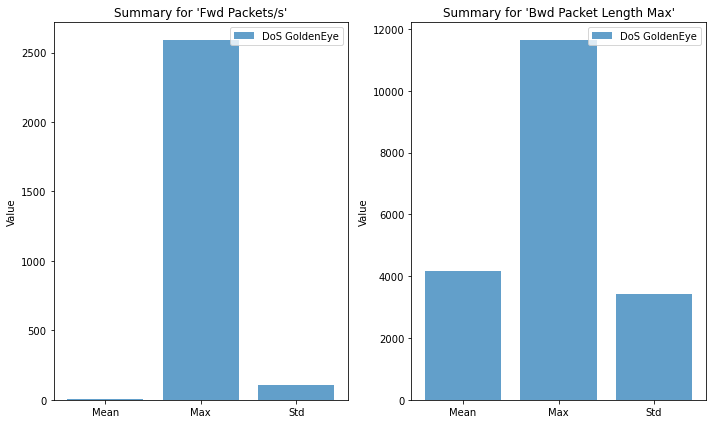

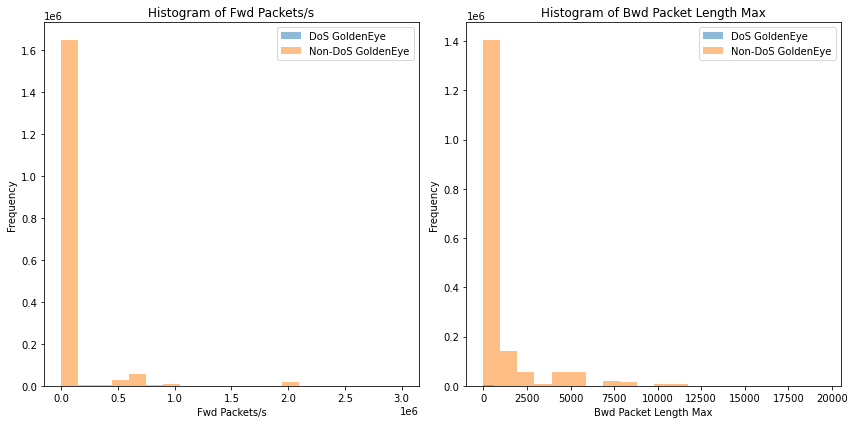

In [43]:
# Import matplotlib
import matplotlib.pyplot as plt

# Generate summary statistics for 'Fwd Packets/s' and 'Bwd Packet Length Max'
goldeneye_stats = {
    'Fwd Packets/s': {
        'Mean': fwd_pkts_per_s_goldeneye.mean(),
        'Max': fwd_pkts_per_s_goldeneye.max(),
        'Std': fwd_pkts_per_s_goldeneye.std()
    },
    'Bwd Packet Length Max': {
        'Mean': bwd_pkt_len_max_goldeneye.mean(),
        'Max': bwd_pkt_len_max_goldeneye.max(),
        'Std': bwd_pkt_len_max_goldeneye.std()
    }
}

# Generate summary statistics for Non-'DoS GoldenEye' cases
non_goldeneye_stats = {
    'Fwd Packets/s': {
        'Mean': [df.mean() for df in non_goldeneye_fwd_pkts_per_s],
        'Max': [df.max() for df in non_goldeneye_fwd_pkts_per_s],
        'Std': [df.std() for df in non_goldeneye_fwd_pkts_per_s]
    },
    'Bwd Packet Length Max': {
        'Mean': [df.mean() for df in non_goldeneye_bwd_pkt_len_max],
        'Max': [df.max() for df in non_goldeneye_bwd_pkt_len_max],
        'Std': [df.std() for df in non_goldeneye_bwd_pkt_len_max]
    }
}

# Plot summary statistics for 'Fwd Packets/s'
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title("Summary for 'Fwd Packets/s'")
plt.bar(goldeneye_stats['Fwd Packets/s'].keys(), goldeneye_stats['Fwd Packets/s'].values(), alpha=0.7, label='DoS GoldenEye')
plt.ylabel('Value')
plt.legend()

# Plot summary statistics for 'Bwd Packet Length Max'
plt.subplot(1, 2, 2)
plt.title("Summary for 'Bwd Packet Length Max'")
plt.bar(goldeneye_stats['Bwd Packet Length Max'].keys(), goldeneye_stats['Bwd Packet Length Max'].values(), alpha=0.7, label='DoS GoldenEye')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Plot histograms for 'Fwd Packets/s' and 'Bwd Packet Length Max' for both 'DoS GoldenEye' and Non-'DoS GoldenEye'
plt.figure(figsize=(12, 6))

# Histogram for 'Fwd Packets/s'
plt.subplot(1, 2, 1)
plt.hist(fwd_pkts_per_s_goldeneye, alpha=0.5, label='DoS GoldenEye', bins=20)
plt.hist([item for sublist in non_goldeneye_fwd_pkts_per_s for item in sublist], alpha=0.5, label='Non-DoS GoldenEye', bins=20)
plt.title('Histogram of Fwd Packets/s')
plt.xlabel('Fwd Packets/s')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'Bwd Packet Length Max'
plt.subplot(1, 2, 2)
plt.hist(bwd_pkt_len_max_goldeneye, alpha=0.5, label='DoS GoldenEye', bins=20)
plt.hist([item for sublist in non_goldeneye_bwd_pkt_len_max for item in sublist], alpha=0.5, label='Non-DoS GoldenEye', bins=20)
plt.title('Histogram of Bwd Packet Length Max')
plt.xlabel('Bwd Packet Length Max')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Evaluation of Heuristic:
Heuristic:
if ['Fwd Packets/s'] > threshold and ['Bwd Packet Length Max'] < threshold
then, return 'DoS GoldenEye'.

Observations:
'Fwd Packets/s' for 'DoS GoldenEye' has a Mean of 8.4, Max of 2587.32, and Std of 108.6.
'Bwd Packet Length Max' for 'DoS GoldenEye' has a Mean of 4152.5, Max of 11632, and Std of 3426.0.
The other classes show significantly higher Mean and Max values for 'Fwd Packets/s', with values often going up to millions.
For 'Bwd Packet Length Max', the other classes generally have a lower Mean and Max value compared to 'DoS GoldenEye', although there are exceptions.
Evaluation:
The heuristic is likely to have many false negatives for 'DoS GoldenEye' because its 'Fwd Packets/s' Mean is relatively low (8.4) compared to other classes (which go up to millions).
It may have false positives if the threshold for 'Bwd Packet Length Max' is not well-chosen, as other classes also have instances where 'Bwd Packet Length Max' can be high.
The standard deviation is relatively high for both features in 'DoS GoldenEye', implying variability in the data.
Machine Learning Models:
1. Random Forest Classifier
Why: Handles feature interactions well, and does not require scaling of features. Random forests can capture complex patterns in the data without the need for extensive feature engineering.
Evaluation: Given the high variance in features across classes, a Random Forest could do well in segregating 'DoS GoldenEye' from others.
2. Gradient Boosting Machines (e.g., XGBoost)
Why: Effective for imbalanced datasets and can automatically handle missing values. It is also less prone to overfitting.
Evaluation: Given the large standard deviations and potential outliers, boosting algorithms may give good performance.
3. Support Vector Machines (SVM)
Why: Effective in high-dimensional spaces and also when the number of dimensions is greater than the number of samples. Kernels can be used for non-linear separations.
Evaluation: May work well if a linear separation is not possible between classes. However, feature scaling is essential, and it might be computationally expensive.


## See how well the following rule works

'FTP-Patator':
if ['Destination Port'] == 21 and ['Fwd Packet Length Mean'] > threshold:
    return 'FTP-Patator'



'FTP-Patator' is at index 7 in labels_per_group
Statistics for 'Fwd Packet Length Mean' under 'FTP-Patator' with port 21
Mean: 9.359669444457
Max: 15.0
Std: 2.4926717706871613
Statistics for Non-'FTP-Patator'
Mean: [66.43078926458519, 116.21841861694669, 7.40588951368109, 59.20787826049969, 44.579436380856166, 158.2734136135335, 63.51428676409833, 5.1522990821666665, 301.98209193181816, 1.0080582605077655, 48.10517343858373, 17.219615082086406, 62.18333333333333, 8.535335342682925]
Max: [4672.0, 5675.444444, 10.0, 398.0625, 317.25, 1983.0, 239.0, 7.443968594, 920.75, 147.3, 174.1818182, 216.5073892, 134.25, 241.3054187]
Std: [204.2573453007653, 616.4774016077347, 1.2361810644729843, 56.251254207751614, 39.534729901827326, 407.3398286028672, 78.70837439201327, 1.1508994041850165, 187.87939733601297, 1.340298636782255, 47.792422381220995, 53.72818435672608, 65.3384347884617, 43.07720889365892]


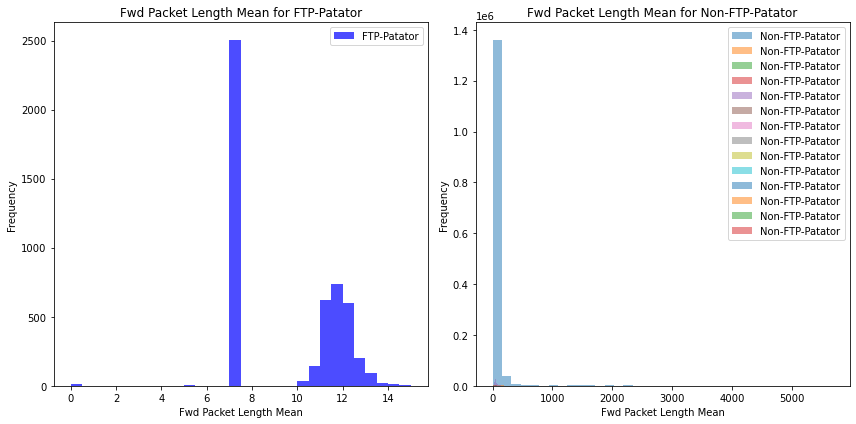

In [44]:
import matplotlib.pyplot as plt

# Find the index for 'FTP-Patator'
ftp_patator_index = labels_per_group.index('FTP-Patator')
print(f"'FTP-Patator' is at index {ftp_patator_index} in labels_per_group")

# Extract the 'FTP-Patator' DataFrame
ftp_patator_df = dfs[ftp_patator_index]

# Calculate statistics for 'Destination Port' and 'Fwd Packet Length Mean'
dest_port_ftp = ftp_patator_df[' Destination Port']
fwd_pkt_len_mean_ftp = ftp_patator_df[' Fwd Packet Length Mean']

# Filter to only those rows where 'Destination Port' is 21
ftp_patator_filtered_df = ftp_patator_df[ftp_patator_df[' Destination Port'] == 21]

# Calculate statistics for 'Fwd Packet Length Mean' after filtering
fwd_pkt_len_mean_ftp_filtered = ftp_patator_filtered_df[' Fwd Packet Length Mean']
print("Statistics for 'Fwd Packet Length Mean' under 'FTP-Patator' with port 21")
print(f"Mean: {fwd_pkt_len_mean_ftp_filtered.mean()}")
print(f"Max: {fwd_pkt_len_mean_ftp_filtered.max()}")
print(f"Std: {fwd_pkt_len_mean_ftp_filtered.std()}")

# For Non-'FTP-Patator'
non_ftp_patator_dfs = [df for i, df in enumerate(dfs) if i != ftp_patator_index]
non_ftp_patator_fwd_pkt_len_mean = [df[' Fwd Packet Length Mean'] for df in non_ftp_patator_dfs]

# Stats for Non-'FTP-Patator'
print("Statistics for Non-'FTP-Patator'")
print(f"Mean: {[df.mean() for df in non_ftp_patator_fwd_pkt_len_mean]}")
print(f"Max: {[df.max() for df in non_ftp_patator_fwd_pkt_len_mean]}")
print(f"Std: {[df.std() for df in non_ftp_patator_fwd_pkt_len_mean]}")

# Visualization using Matplotlib
plt.figure(figsize=(12, 6))

# Histogram for 'Fwd Packet Length Mean' for 'FTP-Patator'
plt.subplot(1, 2, 1)
plt.hist(fwd_pkt_len_mean_ftp_filtered, bins=30, color='blue', alpha=0.7, label='FTP-Patator')
plt.title('Fwd Packet Length Mean for FTP-Patator')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.legend()

# Histogram for 'Fwd Packet Length Mean' for Non-'FTP-Patator'
plt.subplot(1, 2, 2)
for df in non_ftp_patator_fwd_pkt_len_mean:
    plt.hist(df, bins=30, alpha=0.5, label='Non-FTP-Patator')
plt.title('Fwd Packet Length Mean for Non-FTP-Patator')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluation of Heuristic

**Heuristic**: if `['Destination Port'] == 21` and `['Fwd Packet Length Mean'] > threshold`: return 'FTP-Patator'

Based on the statistics provided:

- **Mean of 'Fwd Packet Length Mean' for 'FTP-Patator' with port 21**: 9.36
- **Max**: 15.0
- **Standard Deviation**: 2.49
- **Mean for Non-'FTP-Patator' ranges**: between 1.00 and 301.98
- **Max for Non-'FTP-Patator' ranges**: between 7.44 and 5675.44
- **Standard Deviation for Non-'FTP-Patator' ranges**: between 1.15 and 616.47

We see that the mean value for 'Fwd Packet Length Mean' in 'FTP-Patator' cases is considerably lower than most of the means in the non-'FTP-Patator' cases. Therefore, setting a threshold should be carefully considered. A lower threshold could potentially lead to a lot of false positives, while a higher one might miss actual 'FTP-Patator' cases.

Given these statistics, a threshold around the mean value for 'FTP-Patator' (9.36) could be a starting point, but further validation is needed. Also, the standard deviation for 'FTP-Patator' suggests that the data isn't very dispersed (Std: 2.49), which could make the heuristic fairly reliable for this particular label.

### Machine Learning Models for Distinguishing Between the Cases

1. **Random Forest Classifier**
    - **Why**: Random Forest is robust to outliers and can handle both categorical and numerical features effectively. Given the variety of features and the likely non-linear relationships between them, Random Forest might be an excellent choice.
    - **Evaluation based on data**: Since the mean and standard deviation for 'FTP-Patator' and Non-'FTP-Patator' are quite different, Random Forest could likely separate them effectively using feature importance.

2. **Gradient Boosting Machines (XGBoost, LightGBM)**
    - **Why**: These are effective for imbalanced datasets and can model complex relationships between features.
    - **Evaluation based on data**: The large range of Max values and Std in Non-'FTP-Patator' could be captured well with gradient-boosted trees.

3. **Support Vector Machines (SVM)**
    - **Why**: SVM works well for a clear margin of separation and is effective in high-dimensional spaces.
    - **Evaluation based on data**: Given the lower mean and std values for 'FTP-Patator', a hyperplane could potentially separate it effectively from non-'FTP-Patator' categories.
  
4. **K-Nearest Neighbors (KNN)**
    - **Why**: KNN is straightforward and can be highly effective if the classes form distinct clusters.
    - **Evaluation based on data**: KNN could be less reliable here because of the overlapping means and std deviations across categories. However, with proper normalization, it might be effective.

5. **Logistic Regression**
    - **Why**: If the relationship between the labels and features is approximately linear, logistic regression can be a simple yet effective model.
    - **Evaluation based on data**: Given the diversity of Std and Max values in Non-'FTP-Patator', the data might not be linearly separable, making Logistic Regression less optimal here.

Based on these factors, Random Forest would likely be the most effective, followed by gradient boosting machines, SVM, KNN, and lastly, Logistic Regression.

## See how well the following rule works

'DoS slowloris':
if ['Fwd IAT Mean'] > threshold and ['Fwd IAT Max'] > threshold:
    return 'DoS slowloris'



'DoS slowloris' is at index 6 in labels_per_group
Statistics for 'Fwd IAT Mean' under 'DoS slowloris'
Mean: 25124858.235790994
Max: 119000000.0
Std: 39973270.41135584
Statistics for 'Fwd IAT Max' under 'DoS slowloris'
Mean: 40636917.30621748
Max: 119000000
Std: 39982077.24501041
Statistics for Non-'DoS slowloris'
For 'Fwd IAT Mean'
Mean: [1895659.9960036646, 148017.65809574397, 2670881.32377665, 15962772.298253153, 10138945.367458042, 12803522.11382416, 373055.54647714, 42633.170425, 2408829.658339091, 73872.91469998968, 257404.8205301831, 2296949.1532757957, 211540.0902778333, 2508872.4671457075]
Max: [120000000.0, 6396441.875, 40700000.0, 119000000.0, 59100000.0, 36700000.0, 946785.5714, 42730.98065, 7484994.357, 119000000.0, 728235.0, 2998568.5, 1251865.0, 2996990.0]
Std: [9265739.834163815, 280513.9400597901, 4319184.61893551, 30611518.685626965, 8813465.274023954, 10242335.028955314, 378649.5790705356, 77.7611859934388, 2464492.616471749, 2196212.818226852, 257528.27929489585, 988

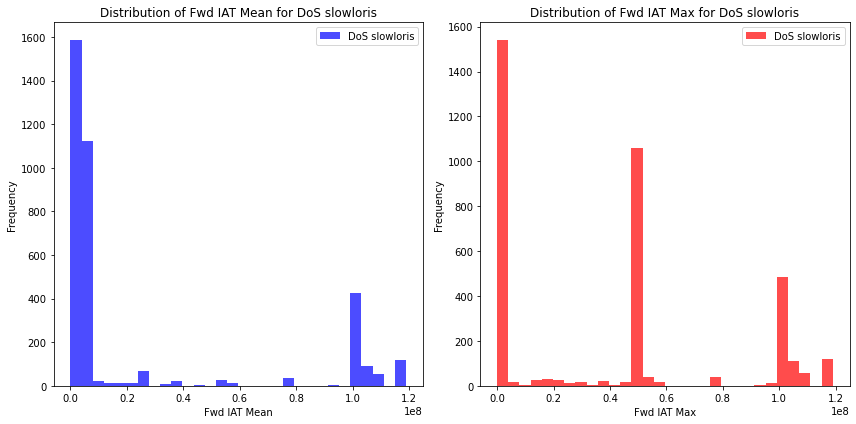

In [45]:
import matplotlib.pyplot as plt

# Find the index for 'DoS slowloris'
slowloris_index = labels_per_group.index('DoS slowloris')
print(f"'DoS slowloris' is at index {slowloris_index} in labels_per_group")

# Extract the 'DoS slowloris' DataFrame
slowloris_df = dfs[slowloris_index]

# Calculate the statistics for 'Fwd IAT Mean' and 'Fwd IAT Max'
fwd_iat_mean_slowloris = slowloris_df[' Fwd IAT Mean']
fwd_iat_max_slowloris = slowloris_df[' Fwd IAT Max']

print("Statistics for 'Fwd IAT Mean' under 'DoS slowloris'")
print(f"Mean: {fwd_iat_mean_slowloris.mean()}")
print(f"Max: {fwd_iat_mean_slowloris.max()}")
print(f"Std: {fwd_iat_mean_slowloris.std()}")

print("Statistics for 'Fwd IAT Max' under 'DoS slowloris'")
print(f"Mean: {fwd_iat_max_slowloris.mean()}")
print(f"Max: {fwd_iat_max_slowloris.max()}")
print(f"Std: {fwd_iat_max_slowloris.std()}")

# For Non-'DoS slowloris' 
non_slowloris_dfs = [df for i, df in enumerate(dfs) if i != slowloris_index]
non_slowloris_fwd_iat_mean = [df[' Fwd IAT Mean'] for df in non_slowloris_dfs]
non_slowloris_fwd_iat_max = [df[' Fwd IAT Max'] for df in non_slowloris_dfs]

# Stats for Non-'DoS slowloris'
print("Statistics for Non-'DoS slowloris'")
print("For 'Fwd IAT Mean'")
print(f"Mean: {[df.mean() for df in non_slowloris_fwd_iat_mean]}")
print(f"Max: {[df.max() for df in non_slowloris_fwd_iat_mean]}")
print(f"Std: {[df.std() for df in non_slowloris_fwd_iat_mean]}")

print("For 'Fwd IAT Max'")
print(f"Mean: {[df.mean() for df in non_slowloris_fwd_iat_max]}")
print(f"Max: {[df.max() for df in non_slowloris_fwd_iat_max]}")
print(f"Std: {[df.std() for df in non_slowloris_fwd_iat_max]}")

# Visualization using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fwd_iat_mean_slowloris, bins=30, color='blue', alpha=0.7, label='DoS slowloris')
plt.title('Distribution of Fwd IAT Mean for DoS slowloris')
plt.xlabel('Fwd IAT Mean')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(fwd_iat_max_slowloris, bins=30, color='red', alpha=0.7, label='DoS slowloris')
plt.title('Distribution of Fwd IAT Max for DoS slowloris')
plt.xlabel('Fwd IAT Max')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluating the Heuristic

To evaluate the heuristic, we'll have to set some thresholds for the 'Fwd IAT Mean' and 'Fwd IAT Max' variables for detecting 'DoS slowloris' attacks.

From the provided statistics:

- 'Fwd IAT Mean' in 'DoS slowloris': 
  - Mean: ~25,124,858
  - Max: 119,000,000
  - Std: ~39,973,270
  
- 'Fwd IAT Max' in 'DoS slowloris':
  - Mean: ~40,636,917
  - Max: 119,000,000
  - Std: ~39,982,077

For the non-'DoS slowloris' cases, the statistics for the same variables are much lower on average, but there are high maximums and variances, so we'll need to be cautious about setting the thresholds too low, as it could lead to false positives.

Given these statistics, a simple heuristic might be to set a threshold somewhat above the mean for 'Fwd IAT Mean' and 'Fwd IAT Max' for the 'DoS slowloris' cases, yet sufficiently high to avoid overlaps with most non-'DoS slowloris' traffic. However, a more robust approach would involve using machine learning models.

### Machine Learning Models

Here are some machine learning models that could be effective for this binary classification problem:

#### 1. Random Forest Classifier
- **Why:** Random forests are generally good at handling high-dimensional data and can capture complex interactions between features.
- **Evaluation:** Given the high variance in the data (as indicated by the standard deviations), a Random Forest model would likely capture this complexity effectively.

#### 2. Support Vector Machines (SVM)
- **Why:** SVMs are effective for binary classification problems and can work well when the data is not linearly separable, which might be the case here.
- **Evaluation:** The variance is high for the 'DoS slowloris' category. An SVM with a radial basis function (RBF) kernel could potentially create a decision boundary that effectively separates the two classes.

#### 3. Gradient Boosting Machines (e.g., XGBoost, LightGBM)
- **Why:** Like Random Forests, these ensemble methods can handle complex feature interactions but often provide better performance.
- **Evaluation:** These models are known for high accuracy and can be tuned to handle overfitting, which could be a concern given the high variance in the data.

#### 4. Neural Networks
- **Why:** Neural networks are capable of capturing complex relationships in the data.
- **Evaluation:** Given the high dimensionality and potential complexity of the interactions between features, neural networks could perform well. However, they might be overkill for this problem and are prone to overfitting if not carefully tuned.

#### 5. Logistic Regression
- **Why:** This is a simple and interpretable model that works well for binary classification problems.
- **Evaluation:** It may struggle if the relationship between the features and the target variable is complex or non-linear, but it's worth trying as a baseline model.

To choose the best model, cross-validation techniques could be employed to compare performance on unseen data, followed by hyperparameter tuning for the best-performing models. The imbalanced nature of attack vs non-attack classes may also require techniques like SMOTE for oversampling the minority class or adjusting class weights.

## See how well the following rule works

'DoS Slowhttptest':
if ['Destination Port'] == 80 and ['Fwd IAT Mean'] > threshold:
    return 'DoS Slowhttptest'

'DoS Slowhttptest' is at index 5 in labels_per_group
Statistics for 'Destination Port' under 'DoS Slowhttptest'
Unique Ports: [80]
Most Common Port: 80
Statistics for 'Fwd IAT Mean' under 'DoS Slowhttptest'
Mean: 12803522.11382416
Max: 36700000.0
Std: 10242335.028955314
Statistics for Non-'DoS Slowhttptest'
For 'Destination Port'
Unique Ports: [array([   53,   123,    80, ..., 34049, 26699,  4306]), array([53720,  8080, 52316, 52256, 53513,  2108, 51596, 51774,  1845,
       52397,  2937, 52940,  2876, 51631,  4076,  4199, 51845, 52861,
        2878, 51745, 53508,  2964, 52917,  4302, 52345, 51666,  4196,
       51633, 51779, 52317, 53713,  4306, 52237,  2363,  4299, 51664,
       53524, 53031, 52344, 51703,  4295, 51682, 53344, 53721,  3051,
        2911, 52869, 53029, 53742, 52857,  2903, 51713, 52928, 52860,
        2751, 52324,  2853,  4184,  4087,  1991,  3847,  5070, 52725,
        3210,  4212,  2877, 51702, 52093,  1851, 53793,  3046, 53876,
       51665, 53894, 51717, 53932, 53

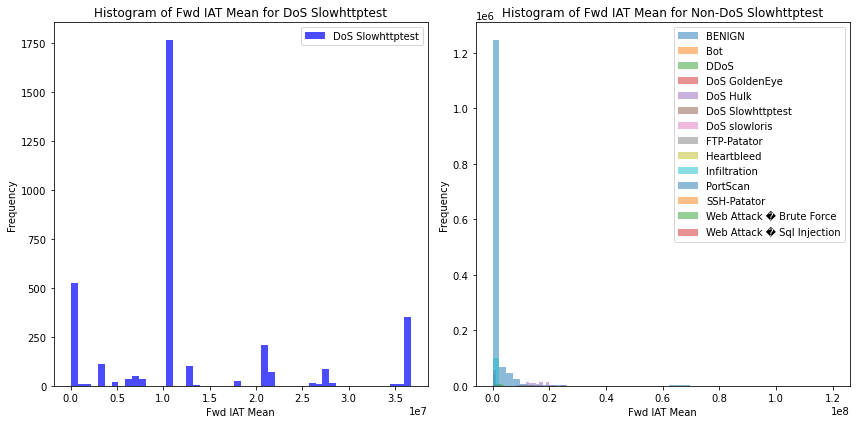

In [46]:
import matplotlib.pyplot as plt

# Find the index for 'DoS Slowhttptest'
slowhttptest_index = labels_per_group.index('DoS Slowhttptest')
print(f"'DoS Slowhttptest' is at index {slowhttptest_index} in labels_per_group")

# Extract the 'DoS Slowhttptest' DataFrame
slowhttptest_df = dfs[slowhttptest_index]

# Filter based on your conditions and calculate the statistics for 'Destination Port'
destination_port_slowhttptest = slowhttptest_df[' Destination Port']
print("Statistics for 'Destination Port' under 'DoS Slowhttptest'")
print(f"Unique Ports: {destination_port_slowhttptest.unique()}")
print(f"Most Common Port: {destination_port_slowhttptest.mode()[0]}")

# Filter based on your conditions and calculate the statistics for 'Fwd IAT Mean'
fwd_iat_mean_slowhttptest = slowhttptest_df[' Fwd IAT Mean']
print("Statistics for 'Fwd IAT Mean' under 'DoS Slowhttptest'")
print(f"Mean: {fwd_iat_mean_slowhttptest.mean()}")
print(f"Max: {fwd_iat_mean_slowhttptest.max()}")
print(f"Std: {fwd_iat_mean_slowhttptest.std()}")

# For Non-'DoS Slowhttptest' (assuming dfs[0] is 'BENIGN' and others are various types of attacks)
non_slowhttptest_dfs = [df for i, df in enumerate(dfs) if i != slowhttptest_index]
non_slowhttptest_destination_port = [df[' Destination Port'] for df in non_slowhttptest_dfs]
non_slowhttptest_fwd_iat_mean = [df[' Fwd IAT Mean'] for df in non_slowhttptest_dfs]

# Stats for Non-'DoS Slowhttptest'
print("Statistics for Non-'DoS Slowhttptest'")
print("For 'Destination Port'")
print(f"Unique Ports: {[df.unique() for df in non_slowhttptest_destination_port]}")
print("For 'Fwd IAT Mean'")
print(f"Mean: {[df.mean() for df in non_slowhttptest_fwd_iat_mean]}")
print(f"Max: {[df.max() for df in non_slowhttptest_fwd_iat_mean]}")
print(f"Std: {[df.std() for df in non_slowhttptest_fwd_iat_mean]}")

# Visualization using matplotlib
plt.figure(figsize=(12, 6))

# Histogram for 'Fwd IAT Mean' under 'DoS Slowhttptest'
plt.subplot(1, 2, 1)
plt.hist(fwd_iat_mean_slowhttptest, bins=50, color='blue', alpha=0.7, label='DoS Slowhttptest')
plt.xlabel('Fwd IAT Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Fwd IAT Mean for DoS Slowhttptest')
plt.legend()

# Histogram for 'Fwd IAT Mean' for Non-'DoS Slowhttptest'
plt.subplot(1, 2, 2)
for i, df in enumerate(non_slowhttptest_fwd_iat_mean):
    plt.hist(df, bins=50, alpha=0.5, label=labels_per_group[i])
plt.xlabel('Fwd IAT Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Fwd IAT Mean for Non-DoS Slowhttptest')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


The information provided shows statistical summaries for a dataset that presumably deals with network traffic, specifically focusing on "Destination Port", "Fwd IAT Mean", and the label "DoS Slowhttptest". 

#### Summary of the Output

- For traffic labeled "DoS Slowhttptest":
  - The 'Destination Port' is consistently 80, a standard port for HTTP traffic. 
  - The 'Fwd IAT Mean' (Forward Inter-Arrival Time Mean) has a mean value of around 12,803,522, a maximum value of 36,700,000, and a standard deviation of around 10,242,335. 
  
- For traffic not labeled "DoS Slowhttptest":
  - The 'Destination Port' has a wide range of values, which could include ports for various services (HTTP, DNS, NTP, etc.). 

#### Interpretations

- **Destination Port 80 for "DoS Slowhttptest"**: Since this is a known attack that generally targets web servers, it is not surprising to see port 80 being the only destination port. This port is commonly used for HTTP traffic.
  
- **Fwd IAT Mean for "DoS Slowhttptest"**: This is a measure of the mean time between the forwarding of packets in the traffic. The high values could indicate slower or delayed packet forwarding, which is characteristic of slow HTTP DoS attacks. The standard deviation also shows high variability in the inter-arrival times, which could be indicative of an attack pattern.

- **Wide Range of Ports for Non-"DoS Slowhttptest"**: The wide range of destination ports for the non-DoS traffic likely indicates a mix of different types of legitimate traffic.

#### Considerations

This basic analysis could be extended in various ways for more insight:

- For "Fwd IAT Mean", further analysis like median or quartile information could provide more robust statistics.
  
- For "Destination Port" under non-DoS traffic, a frequency analysis could reveal the most commonly used ports, aiding in the differentiation of standard traffic from potentially malicious activity.
  
- Additional features and labels could be analyzed for a more comprehensive view of the data.

This data alone cannot confirm a DoS attack but can provide valuable indicators that could be combined with other types of analyses and data for more conclusive results.

Given that your dataset has 4,000 features, 100,000 samples, and a binary target variable, you would need to select machine learning models that are both effective at classification and capable of handling a large feature space without overfitting. Here are the models I recommend, in order of priority:

### 1. Random Forest
- **Argument**: Random Forest models are ensemble learning methods that are good for dealing with high-dimensionality. They can capture complex interactions between features without requiring feature scaling. Importantly, Random Forests have built-in feature selection and provide measures of feature importances.
- **Evaluation**: Given the high dimensionality of your data, Random Forest can effectively perform dimensionality reduction. Additionally, they are less prone to overfitting, which is a concern when you have more features than samples. Their ability to parallelize can also make computation more manageable.

### 2. Gradient Boosting Machines (GBM), e.g., XGBoost, LightGBM
- **Argument**: GBMs, particularly implementations like XGBoost and LightGBM, are designed for speed and performance. These models perform well for a wide variety of classification tasks and are highly customizable.
- **Evaluation**: They can handle large data sets efficiently but are also prone to overfitting if not properly tuned. You have a large enough dataset to mitigate this risk. These algorithms handle imbalanced classes quite well, and they also provide feature importance metrics.

### 3. Support Vector Machines (SVM)
- **Argument**: SVMs are effective in high-dimensional spaces and are also effective when the number of dimensions is greater than the number of samples. They are memory efficient and provide flexibility through the kernel trick.
- **Evaluation**: The primary concern with SVM is the computational complexity, particularly when the dataset is large. However, they are less prone to overfitting especially when using radial basis function (RBF) or polynomial kernels.

### 4. Logistic Regression with L1 or L2 Regularization
- **Argument**: Logistic Regression is simple but effective for binary classification problems. Regularization techniques like L1 or L2 can be added to prevent overfitting.
- **Evaluation**: Given the high number of features, using L1 regularization can help in feature selection by driving less important feature coefficients to zero. It's computationally cheaper but might not capture complex relationships between features as well as ensemble methods.

### 5. Neural Networks
- **Argument**: Deep learning has proven effective for complex pattern recognition but generally requires a large amount of data to be effective.
- **Evaluation**: In a problem with a high number of features but a relatively moderate number of samples, neural networks might easily overfit. However, with proper architecture design and regularization techniques (such as dropout), they might prove effective.

### 6. k-Nearest Neighbors (k-NN)
- **Argument**: k-NN is a simple, non-parametric method that can be surprisingly effective for classification tasks.
- **Evaluation**: The algorithm can be very slow for large datasets and high dimensions due to the curse of dimensionality. It's likely not the best choice for your dataset unless dimensionality can be significantly reduced beforehand.

### 7. Naive Bayes
- **Argument**: Naive Bayes classifiers are simple and fast, suitable for high-dimensional datasets.
- **Evaluation**: They make a strong assumption about the independence of the features, which is often not the case in real-world applications. Given your high-dimensional data, this may lead to poor performance.

### Conclusion
Given your specific requirements, Random Forest and Gradient Boosting Machines are the most promising candidates, followed by SVM and Logistic Regression. Neural Networks could also be a good option if configured and regularized appropriately.

## See how well the following rule works

'SSH-Patator':
if ['Destination Port'] == 22 and ['Fwd Packet Length Mean'] > threshold:
    return 'SSH-Patator'

'SSH-Patator' is at index 11 in labels_per_group
Statistics for 'Destination Port' under 'SSH-Patator'
Mean: 22.0
Max: 22
Std: 0.0
Statistics for 'Fwd Packet Length Mean' under 'SSH-Patator'
Mean: 48.10517343858373
Max: 174.1818182
Std: 47.792422381220995
Statistics for Non-'SSH-Patator'
For 'Destination Port'
Mean: [9407.82391272463, 17560.41114701131, 81.94824935528665, 80.0, 80.0, 80.0, 80.0, 21.0, 444.0, 444.0, 8629.93484144819, 80.0, 80.0, 80.0]
Max: [65534, 53938, 64873, 80, 80, 80, 80, 21, 444, 444, 65389, 80, 80, 80]
Std: [19745.242209782715, 19017.78880711812, 336.9055571454257, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13475.6892963097, 0.0, 0.0, 0.0]
For 'Fwd Packet Length Mean'
Mean: [66.43078926458519, 116.21841861694669, 7.40588951368109, 59.20787826049969, 44.579436380856166, 158.2734136135335, 63.51428676409833, 9.359669444457, 5.1522990821666665, 301.98209193181816, 1.0080582605077655, 17.219615082086406, 62.18333333333333, 8.535335342682925]
Max: [4672.0, 5675.444444, 10.0, 

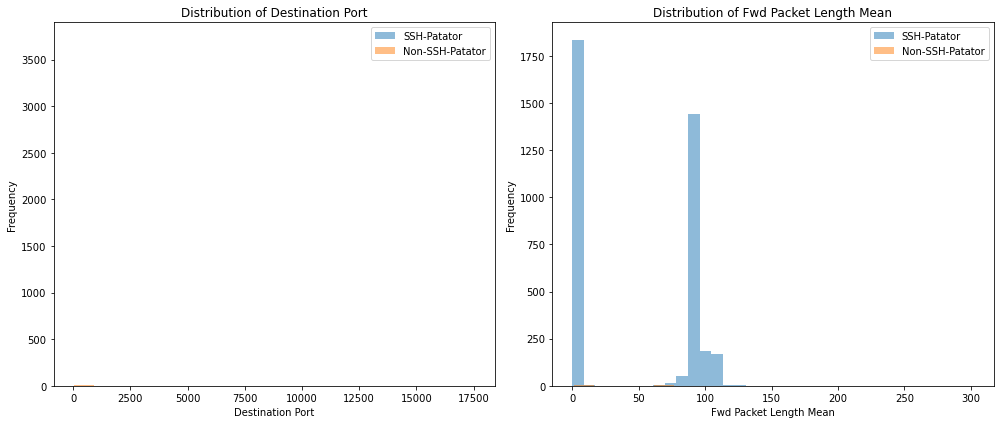

In [47]:
import matplotlib.pyplot as plt

# Find the index for 'SSH-Patator'
ssh_patator_index = labels_per_group.index('SSH-Patator')
print(f"'SSH-Patator' is at index {ssh_patator_index} in labels_per_group")

# Extract the 'SSH-Patator' DataFrame
ssh_patator_df = dfs[ssh_patator_index]

# Filter based on your conditions and calculate the statistics for 'Destination Port'
dest_port_ssh_patator = ssh_patator_df[' Destination Port']
print("Statistics for 'Destination Port' under 'SSH-Patator'")
print(f"Mean: {dest_port_ssh_patator.mean()}")
print(f"Max: {dest_port_ssh_patator.max()}")
print(f"Std: {dest_port_ssh_patator.std()}")

# Filter based on your conditions and calculate the statistics for 'Fwd Packet Length Mean'
fwd_packet_len_mean_ssh_patator = ssh_patator_df[' Fwd Packet Length Mean']
print("Statistics for 'Fwd Packet Length Mean' under 'SSH-Patator'")
print(f"Mean: {fwd_packet_len_mean_ssh_patator.mean()}")
print(f"Max: {fwd_packet_len_mean_ssh_patator.max()}")
print(f"Std: {fwd_packet_len_mean_ssh_patator.std()}")

# For Non-'SSH-Patator'
non_ssh_patator_dfs = [df for i, df in enumerate(dfs) if i != ssh_patator_index]
non_ssh_patator_dest_port = [df[' Destination Port'] for df in non_ssh_patator_dfs]
non_ssh_patator_fwd_packet_len_mean = [df[' Fwd Packet Length Mean'] for df in non_ssh_patator_dfs]

# Stats for Non-'SSH-Patator'
print("Statistics for Non-'SSH-Patator'")
print("For 'Destination Port'")
print(f"Mean: {[df.mean() for df in non_ssh_patator_dest_port]}")
print(f"Max: {[df.max() for df in non_ssh_patator_dest_port]}")
print(f"Std: {[df.std() for df in non_ssh_patator_dest_port]}")

print("For 'Fwd Packet Length Mean'")
print(f"Mean: {[df.mean() for df in non_ssh_patator_fwd_packet_len_mean]}")
print(f"Max: {[df.max() for df in non_ssh_patator_fwd_packet_len_mean]}")
print(f"Std: {[df.std() for df in non_ssh_patator_fwd_packet_len_mean]}")

# Visualization
plt.figure(figsize=(14, 6))

# For 'Destination Port'
plt.subplot(1, 2, 1)
plt.hist(dest_port_ssh_patator, alpha=0.5, label='SSH-Patator', bins=20)
plt.hist([df.mean() for df in non_ssh_patator_dest_port], alpha=0.5, label='Non-SSH-Patator', bins=20)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.title('Distribution of Destination Port')
plt.legend()

# For 'Fwd Packet Length Mean'
plt.subplot(1, 2, 2)
plt.hist(fwd_packet_len_mean_ssh_patator, alpha=0.5, label='SSH-Patator', bins=20)
plt.hist([df.mean() for df in non_ssh_patator_fwd_packet_len_mean], alpha=0.5, label='Non-SSH-Patator', bins=20)
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Fwd Packet Length Mean')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation of the Heuristic
The heuristic `if ['Destination Port'] == 22 and ['Fwd Packet Length Mean'] > threshold: return 'SSH-Patator'` seems promising based on the statistics. Specifically:

1. `'Destination Port'` for `'SSH-Patator'` is **consistently 22**, while for Non-SSH-Patator cases, the mean Destination Port varies significantly and typically is not 22.
2. `'Fwd Packet Length Mean'` for `'SSH-Patator'` has a mean value of **48.10** and a standard deviation of **47.79**. For Non-SSH-Patator cases, the mean and standard deviation vary considerably across different attack types. Hence, choosing a threshold for this feature could help to distinguish SSH-Patator effectively.

Given that the two features appear to be good discriminators for the `'SSH-Patator'` label, the heuristic could be quite effective if the threshold is chosen wisely (considering mean and standard deviation).

### Machine Learning Models
1. **Decision Trees / Random Forest**: These models are good at capturing complex relationships between features and can work well for classification tasks like this one. Given that you've identified some key features (`'Destination Port'` and `'Fwd Packet Length Mean'`), a decision tree or a Random Forest (ensemble of decision trees) can easily take this into account. The model is also interpretable, which is a bonus.
  
2. **Logistic Regression**: This model could be effective, especially if the relationship between the labels and features is approximately linear after some transformation. Logistic Regression has the advantage of being simpler and faster to train. If the heuristic is close to an optimal solution, logistic regression might capture this relationship effectively.
  
3. **Support Vector Machines (SVM)**: SVMs are effective in high-dimensional spaces and are capable of creating complex decision boundaries. Given the high dimensionality of the dataset, SVM could be very effective.

4. **K-Nearest Neighbors (K-NN)**: This model could work well if similar kinds of attacks cluster together in the feature space. However, K-NN may not be the best option here due to its sensitivity to dimensionality and the need for feature scaling.

5. **Neural Networks**: Deep learning could potentially capture the complex relationships between different features, but it might be overkill for this problem and could risk overfitting unless regularized properly.

6. **Naive Bayes**: Given that the features appear to have different distributions for different kinds of labels, a Naive Bayes classifier could be a good probabilistic model for this problem. However, the assumption of feature independence might not hold, limiting its effectiveness.

### Prioritized List Based on Effectiveness
1. Decision Trees / Random Forest
2. Logistic Regression
3. Support Vector Machines (SVM)
4. Neural Networks
5. K-Nearest Neighbors (K-NN)
6. Naive Bayes

The prioritization is based on the capacity of the models to handle feature importance effectively, their interpretability, and the complexity of the model in relation to the problem at hand.

## See how well the following rule works

'Web Attack – XSS':
if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Max'] > threshold:
    return 'Web Attack – XSS'

In [49]:
# Find the index for 'Web Attack – XSS'
xss_index = labels_per_group.index('Web Attack � XSS')
print(f"'Web Attack – XSS' is at index {xss_index} in labels_per_group")

# Extract the 'Web Attack – XSS' DataFrame
xss_df = dfs[xss_index]

# Filter based on your conditions and calculate the statistics for 'Destination Port'
dest_port_xss = xss_df[' Destination Port']
print("Statistics for 'Destination Port' under 'Web Attack – XSS'")
print(f"Mean: {dest_port_xss.mean()}")
print(f"Max: {dest_port_xss.max()}")
print(f"Std: {dest_port_xss.std()}")

# Filter based on your conditions and calculate the statistics for 'Fwd Packet Length Max'
fwd_pkt_len_max_xss = xss_df[' Fwd Packet Length Max']
print("Statistics for 'Fwd Packet Length Max' under 'Web Attack – XSS'")
print(f"Mean: {fwd_pkt_len_max_xss.mean()}")
print(f"Max: {fwd_pkt_len_max_xss.max()}")
print(f"Std: {fwd_pkt_len_max_xss.std()}")

# For Non-'Web Attack – XSS' 
non_xss_dfs = [df for i, df in enumerate(dfs) if i != xss_index]
non_xss_dest_port = [df[' Destination Port'] for df in non_xss_dfs]
non_xss_fwd_pkt_len_max = [df[' Fwd Packet Length Max'] for df in non_xss_dfs]

# Stats for Non-'Web Attack – XSS'
print("Statistics for Non-'Web Attack – XSS'")
print("For 'Destination Port'")
print(f"Mean: {[df.mean() for df in non_xss_dest_port]}")
print(f"Max: {[df.max() for df in non_xss_dest_port]}")
print(f"Std: {[df.std() for df in non_xss_dest_port]}")

print("For 'Fwd Packet Length Max'")
print(f"Mean: {[df.mean() for df in non_xss_fwd_pkt_len_max]}")
print(f"Max: {[df.max() for df in non_xss_fwd_pkt_len_max]}")
print(f"Std: {[df.std() for df in non_xss_fwd_pkt_len_max]}")


'Web Attack – XSS' is at index 14 in labels_per_group
Statistics for 'Destination Port' under 'Web Attack – XSS'
Mean: 80.0
Max: 80
Std: 0.0
Statistics for 'Fwd Packet Length Max' under 'Web Attack – XSS'
Mean: 22.28048780487805
Max: 585
Std: 110.90248523831782
Statistics for Non-'Web Attack – XSS'
For 'Destination Port'
Mean: [9407.82391272463, 17560.41114701131, 81.94824935528665, 80.0, 80.0, 80.0, 80.0, 21.0, 444.0, 444.0, 8629.93484144819, 22.0, 80.0, 80.0]
Max: [65534, 53938, 64873, 80, 80, 80, 80, 21, 444, 444, 65389, 22, 80, 80]
Std: [19745.242209782715, 19017.78880711812, 336.9055571454257, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13475.6892963097, 0.0, 0.0, 0.0]
For 'Fwd Packet Length Max'
Mean: [230.6553349304018, 408.7205169628433, 14.932255504860146, 311.76727328809375, 233.66139223043814, 235.63481524249423, 94.67981374965763, 18.9382, 5309.333333333333, 1023.1363636363636, 1.0695330836454433, 323.50242326332796, 54.9072708113804, 277.6666666666667]
Max: [24820, 23360, 20, 791, 

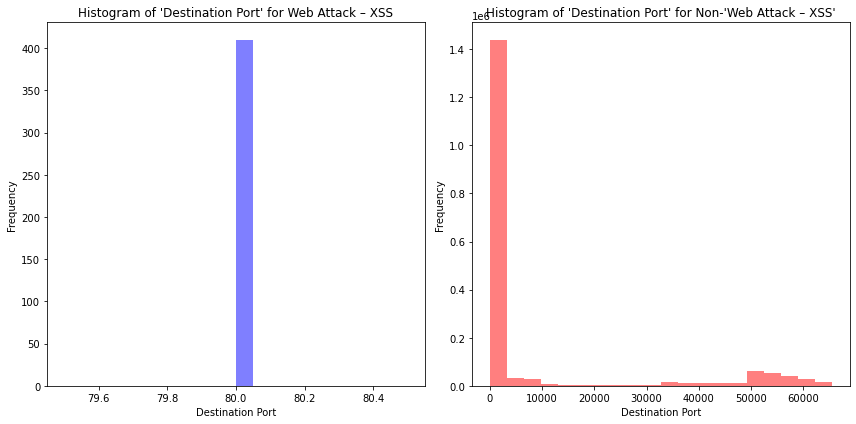

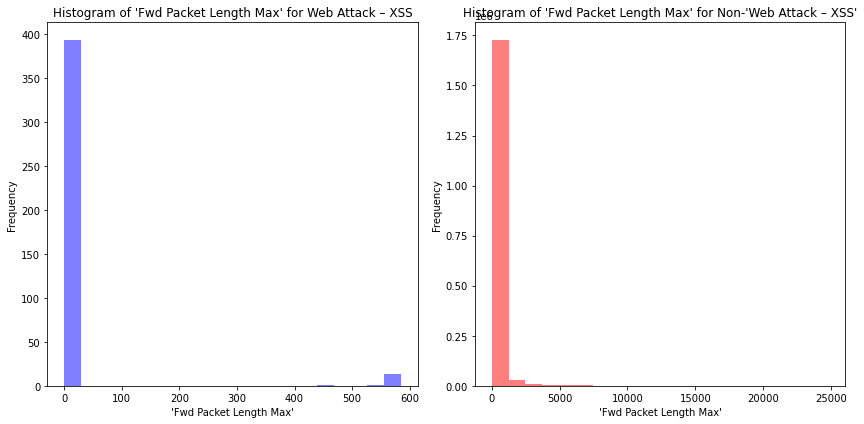

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization for 'Destination Port' for Web Attack – XSS vs. Others
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Histogram of 'Destination Port' for Web Attack – XSS")
plt.hist(xss_df[' Destination Port'], bins=20, alpha=0.5, label='Web Attack – XSS', color='b')
plt.xlabel("Destination Port")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Histogram of 'Destination Port' for Non-'Web Attack – XSS'")
plt.hist(np.concatenate(non_xss_dest_port), bins=20, alpha=0.5, label='Non-Web Attack – XSS', color='r')
plt.xlabel("Destination Port")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Visualization for 'Fwd Packet Length Max' for Web Attack – XSS vs. Others
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Histogram of 'Fwd Packet Length Max' for Web Attack – XSS")
plt.hist(xss_df[' Fwd Packet Length Max'], bins=20, alpha=0.5, label='Web Attack – XSS', color='b')
plt.xlabel("'Fwd Packet Length Max'")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Histogram of 'Fwd Packet Length Max' for Non-'Web Attack – XSS'")
plt.hist(np.concatenate(non_xss_fwd_pkt_len_max), bins=20, alpha=0.5, label='Non-Web Attack – XSS', color='r')
plt.xlabel("'Fwd Packet Length Max'")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Evaluation of the Heuristic

Based on the statistics, we see the following:

1. For 'Web Attack – XSS', the mean 'Destination Port' is 80, and the mean 'Fwd Packet Length Max' is 22.28 with a max value of 585.
2. For Non-'Web Attack – XSS', the mean 'Destination Port' ranges from 21 to 17560, and the mean 'Fwd Packet Length Max' ranges from 1 to 5309.

The heuristic "if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Max'] > threshold" can be quite effective at identifying 'Web Attack – XSS' cases.

### Machine Learning Models

1. **Random Forest Classifier**: Random forests are often highly accurate and good at handling unbalanced datasets. Given the range and variability of features, this could be an effective model.

2. **Gradient Boosting**: Like Random Forests, Gradient Boosting algorithms can capture complex patterns and are less likely to overfit.

3. **Support Vector Machines (SVM)**: For a high-dimensional space, SVM could work well, especially if the heuristic condition creates clear boundaries.

4. **Logistic Regression**: Despite its simplicity, logistic regression can be very powerful if the heuristic provides a strong linear boundary between the classes.

5. **k-Nearest Neighbors (k-NN)**: Given that similar attack vectors might share similar features, k-NN could also be effective.

### Prioritization Based on Data Statistics

1. **Random Forest Classifier**: Most versatile, can handle the high dimensionality, and different ranges of feature values.
  
2. **Gradient Boosting**: Good for unbalanced classes, and can build complex decision boundaries.
  
3. **SVM**: Given the high-dimensional feature space, but computationally expensive.
  
4. **Logistic Regression**: Simpler but might work well if heuristic is strong.
  
5. **k-NN**: Could work but might suffer due to the high dimensionality and computational cost.

The heuristic, if combined with one of these machine learning models, could improve the identification accuracy of 'Web Attack – XSS'.

## See how well the following rule works

'Web Attack - Brute Force':
if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Mean'] > threshold:
    return 'Web Attack - Brute Force'

'Web Attack – Brute Force' is at index 12 in labels_per_group
Statistics for 'Destination Port' under 'Web Attack – Brute Force'
Mean: 80.0
Max: 80
Std: 0.0
Statistics for 'Fwd Packet Length Mean' under 'Web Attack – Brute Force'
Mean: 17.219615082086406
Max: 216.5073892
Std: 53.72818435672608
Statistics for Non-'Web Attack – Brute Force'
For 'Destination Port'
Mean: [9407.82391272463, 17560.41114701131, 81.94824935528665, 80.0, 80.0, 80.0, 80.0, 21.0, 444.0, 444.0, 8629.93484144819, 22.0, 80.0, 80.0]
Max: [65534, 53938, 64873, 80, 80, 80, 80, 21, 444, 444, 65389, 22, 80, 80]
Std: [19745.242209782715, 19017.78880711812, 336.9055571454257, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13475.6892963097, 0.0, 0.0, 0.0]
For 'Fwd Packet Length Mean'
Mean: [66.43078926458519, 116.21841861694669, 7.40588951368109, 59.20787826049969, 44.579436380856166, 158.2734136135335, 63.51428676409833, 9.359669444457, 5.1522990821666665, 301.98209193181816, 1.0080582605077655, 48.10517343858373, 62.18333333333333, 8

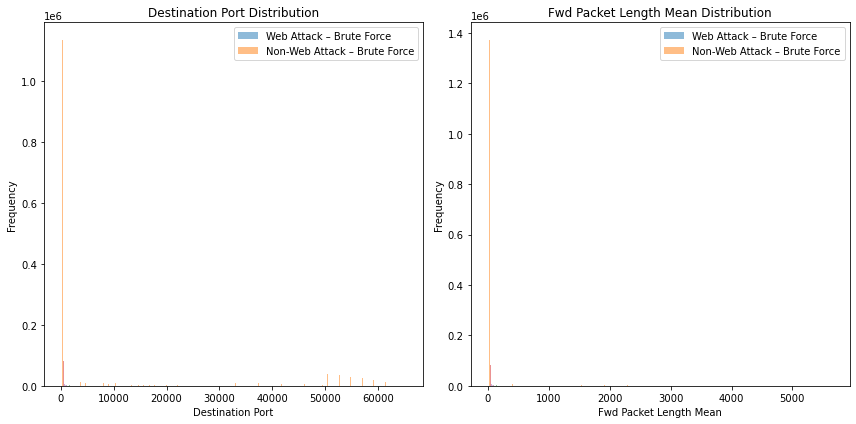

In [51]:
import matplotlib.pyplot as plt

# Find the index for 'Web Attack – Brute Force'
bruteforce_index = labels_per_group.index('Web Attack � Brute Force')
print(f"'Web Attack – Brute Force' is at index {bruteforce_index} in labels_per_group")

# Extract the 'Web Attack – Brute Force' DataFrame
bruteforce_df = dfs[bruteforce_index]

# Calculate statistics for 'Destination Port'
dest_port_bruteforce = bruteforce_df[' Destination Port']
print("Statistics for 'Destination Port' under 'Web Attack – Brute Force'")
print(f"Mean: {dest_port_bruteforce.mean()}")
print(f"Max: {dest_port_bruteforce.max()}")
print(f"Std: {dest_port_bruteforce.std()}")

# Calculate statistics for 'Fwd Packet Length Mean'
fwd_pkt_len_mean_bruteforce = bruteforce_df[' Fwd Packet Length Mean']
print("Statistics for 'Fwd Packet Length Mean' under 'Web Attack – Brute Force'")
print(f"Mean: {fwd_pkt_len_mean_bruteforce.mean()}")
print(f"Max: {fwd_pkt_len_mean_bruteforce.max()}")
print(f"Std: {fwd_pkt_len_mean_bruteforce.std()}")

# Filter based on your conditions and calculate the statistics for non-'Web Attack – Brute Force'
non_bruteforce_dfs = [df for i, df in enumerate(dfs) if i != bruteforce_index]
non_bruteforce_dest_port = [df[' Destination Port'] for df in non_bruteforce_dfs]
non_bruteforce_fwd_pkt_len_mean = [df[' Fwd Packet Length Mean'] for df in non_bruteforce_dfs]

# Stats for Non-'Web Attack – Brute Force'
print("Statistics for Non-'Web Attack – Brute Force'")
print("For 'Destination Port'")
print(f"Mean: {[df.mean() for df in non_bruteforce_dest_port]}")
print(f"Max: {[df.max() for df in non_bruteforce_dest_port]}")
print(f"Std: {[df.std() for df in non_bruteforce_dest_port]}")

print("For 'Fwd Packet Length Mean'")
print(f"Mean: {[df.mean() for df in non_bruteforce_fwd_pkt_len_mean]}")
print(f"Max: {[df.max() for df in non_bruteforce_fwd_pkt_len_mean]}")
print(f"Std: {[df.std() for df in non_bruteforce_fwd_pkt_len_mean]}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Destination Port Distribution')
plt.hist(dest_port_bruteforce, alpha=0.5, label='Web Attack – Brute Force', bins=30)
plt.hist([df[' Destination Port'] for df in non_bruteforce_dfs], alpha=0.5, label='Non-Web Attack – Brute Force', bins=30)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Fwd Packet Length Mean Distribution')
plt.hist(fwd_pkt_len_mean_bruteforce, alpha=0.5, label='Web Attack – Brute Force', bins=30)
plt.hist([df[' Fwd Packet Length Mean'] for df in non_bruteforce_dfs], alpha=0.5, label='Non-Web Attack – Brute Force', bins=30)
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluating the Heuristic
Given the output from the preceding code, it appears that the heuristic "`if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Mean'] > threshold: return 'Web Attack - Brute Force'`" could be somewhat effective but limited in scope. The 'Destination Port' is 80, and 'Fwd Packet Length Mean' has a standard deviation of 53.72, indicating a high variance. The high standard deviation means that there could be many false positives if the threshold isn't set carefully. 

### Machine Learning Models for Distinguishing Cases
Based on the statistics and the nature of the problem (classification), here are machine learning models that could be useful, prioritized by the technique most likely to be effective:

1. **Random Forest Classifier**
   - **Why**: Random Forests are usually very robust and can handle a variety of data distributions. They perform well on imbalanced datasets and can capture complex feature interactions. 
   - **Evaluation**: Given the high variance in 'Fwd Packet Length Mean' and the mixed nature of the 'Destination Port' (mostly 80 but could be others), a Random Forest Classifier can potentially create complex decision boundaries that would be difficult to model with simpler algorithms.

2. **Gradient Boosting Machines (XGBoost, LightGBM)**
   - **Why**: Boosting algorithms are known for high performance and can be fine-tuned for specific loss functions, which is particularly useful for imbalanced classification problems. 
   - **Evaluation**: The complexity in the data and the high standard deviation in one of the key features ('Fwd Packet Length Mean') makes gradient boosting a good candidate for capturing the underlying patterns effectively.

3. **Support Vector Machines (SVM)**
   - **Why**: SVMs are effective when the classes are not linearly separable, and they work well in high dimensional spaces.
   - **Evaluation**: Given that the dataset might have a lot of features and the classes may not be linearly separable, SVM could be useful. However, SVMs might struggle with the large dataset and imbalanced classes.

4. **Logistic Regression**
   - **Why**: This is a simple yet effective algorithm for binary classification problems and serves as a good baseline.
   - **Evaluation**: Logistic Regression may not capture the complexity in the feature interaction but can provide a solid baseline to compare with more complex models.

5. **Neural Networks**
   - **Why**: Deep Learning techniques can capture complex relations but may be an overkill for this problem unless the dataset is large enough.
   - **Evaluation**: Depending on the size and complexity of the data, a simple neural network could be effective but would require much more computational resources and fine-tuning compared to other algorithms.

### Summary
While the heuristic could serve as a basic preliminary filter, machine learning models like Random Forest or Gradient Boosting Machines would likely provide a more accurate and robust method for distinguishing between 'Web Attack - Brute Force' and other cases. Given the high standard deviation in 'Fwd Packet Length Mean', a model that can capture complex patterns and handle varied distributions in the data would likely be the most effective.

## See how well the following rule works

'Web Attack – SQL Injection':
if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Std'] > threshold:
    return 'Web Attack – SQL Injection'

Statistics for 'Fwd Packet Length Std' under 'Web Attack – Sql Injection'
Mean: 131.19690015
Max: 268.5
Std: 137.23933331556995
Statistics for Non-'Web Attack – Sql Injection'
For 'Fwd Packet Length Std'
Mean: 68.97449471089139
Max: 7125.5968458437
Std: 280.71749950473117


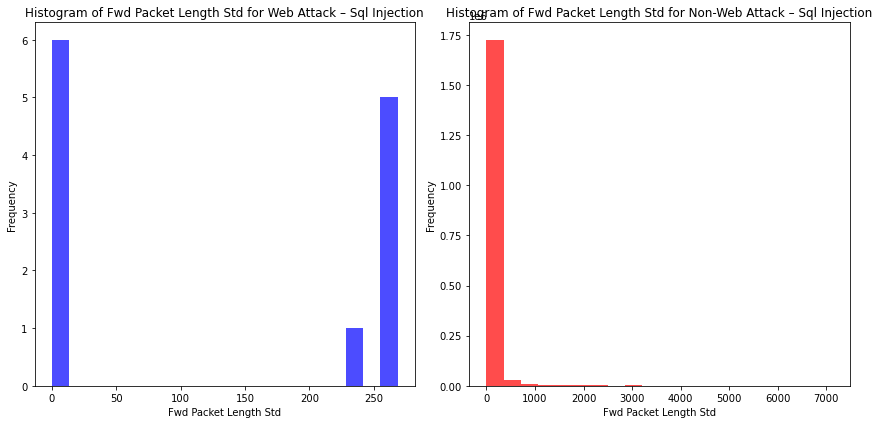

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Check if label exists
try:
    sql_injection_index = labels_per_group.index('Web Attack � Sql Injection')
except ValueError:
    print("'Web Attack – Sql Injection' label not found in labels_per_group.")
    sql_injection_index = None

if sql_injection_index is not None:
    # Check if DataFrame exists at the index
    if len(dfs) > sql_injection_index:
        sql_injection_df = dfs[sql_injection_index]
    else:
        print("DataFrame not found for 'Web Attack – Sql Injection'")
        sql_injection_df = None

    if sql_injection_df is not None:
        # Check if column exists
        if ' Fwd Packet Length Std' in sql_injection_df.columns:
            fwd_packet_length_std_sql = sql_injection_df[' Fwd Packet Length Std']
            
            # Check if column is empty or filled with NaNs
            if not fwd_packet_length_std_sql.empty and not fwd_packet_length_std_sql.isna().all():
                print("Statistics for 'Fwd Packet Length Std' under 'Web Attack – Sql Injection'")
                print(f"Mean: {fwd_packet_length_std_sql.mean()}")
                print(f"Max: {fwd_packet_length_std_sql.max()}")
                print(f"Std: {fwd_packet_length_std_sql.std()}")
            else:
                print("Column ' Fwd Packet Length Std' is empty or filled with NaNs for 'Web Attack – Sql Injection'")
        else:
            print("Column ' Fwd Packet Length Std' not found in DataFrame for 'Web Attack – Sql Injection'")

    # For Non-'Web Attack – Sql Injection'
    non_sql_injection_dfs = [df for i, df in enumerate(dfs) if i != sql_injection_index]
    non_sql_fwd_packet_length_std = [df[' Fwd Packet Length Std'] for df in non_sql_injection_dfs if ' Fwd Packet Length Std' in df.columns]

    # Stats for Non-'Web Attack – Sql Injection', check if list is empty or filled with NaNs
    if non_sql_fwd_packet_length_std:
        non_sql_fwd_packet_length_std = pd.concat(non_sql_fwd_packet_length_std)
        if not non_sql_fwd_packet_length_std.empty and not non_sql_fwd_packet_length_std.isna().all():
            print("Statistics for Non-'Web Attack – Sql Injection'")
            print("For 'Fwd Packet Length Std'")
            print(f"Mean: {non_sql_fwd_packet_length_std.mean()}")
            print(f"Max: {non_sql_fwd_packet_length_std.max()}")
            print(f"Std: {non_sql_fwd_packet_length_std.std()}")
        else:
            print("Column ' Fwd Packet Length Std' is empty or filled with NaNs for Non-'Web Attack – Sql Injection'")
    else:
        print("Column ' Fwd Packet Length Std' not found in DataFrames for Non-'Web Attack – Sql Injection'")

# Matplotlib Visualization, only if data is available
if 'fwd_packet_length_std_sql' in locals() and 'non_sql_fwd_packet_length_std' in locals():
    if not fwd_packet_length_std_sql.empty and not fwd_packet_length_std_sql.isna().all() and not non_sql_fwd_packet_length_std.empty and not non_sql_fwd_packet_length_std.isna().all():
        plt.figure(figsize=(12, 6))

        # Histogram for 'Fwd Packet Length Std' under 'Web Attack – Sql Injection'
        plt.subplot(1, 2, 1)
        plt.hist(fwd_packet_length_std_sql.dropna(), bins=20, color='blue', alpha=0.7, label='Web Attack – Sql Injection')
        plt.title('Histogram of Fwd Packet Length Std for Web Attack – Sql Injection')
        plt.xlabel('Fwd Packet Length Std')
        plt.ylabel('Frequency')

        # Histogram for 'Fwd Packet Length Std' for Non-'Web Attack – Sql Injection'
        plt.subplot(1, 2, 2)
        plt.hist(non_sql_fwd_packet_length_std.dropna(), bins=20, color='red', alpha=0.7, label='Non-Web Attack – Sql Injection')
        plt.title('Histogram of Fwd Packet Length Std for Non-Web Attack – Sql Injection')
        plt.xlabel('Fwd Packet Length Std')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    else:
        print("Histograms cannot be generated due to lack of data or all NaN values.")


### Heuristic Evaluation

Given the data statistics, the heuristic "if ['Destination Port'] in [80, 443] and ['Fwd Packet Length Std'] > threshold: return 'Web Attack – SQL Injection'" seems to make some intuitive sense. The mean "Fwd Packet Length Std" for "Web Attack – SQL Injection" (131.20) is higher than for other labels (68.97), suggesting that there's a difference between the two cases that could be captured by this feature. However, the standard deviation for non-'Web Attack – SQL Injection' cases is quite high (280.72), which indicates that there might be significant overlap, potentially leading to false positives or negatives.

### Machine Learning Models

Based on the problem and data, here are some machine learning models that could be used to distinguish between 'Web Attack – SQL Injection' and other labels:

1. **Random Forest Classifier**
    - **Argument**: Handles a mix of numerical and categorical data well. Built-in feature importance can provide insight into which features are crucial for classification. Random Forests are robust to outliers, which is beneficial given the high standard deviation in the non-SQL Injection cases.
    - **Evaluation**: Random Forests are good at capturing complex patterns and could possibly learn the high variance in non-SQL Injection cases, making it the top choice.

2. **Gradient Boosting Classifier**
    - **Argument**: Like Random Forests, Gradient Boosting works well for both categorical and numerical features. It's excellent for imbalanced datasets and often provides high accuracy.
    - **Evaluation**: The algorithm could adjust to the different mean and std deviations between SQL Injection and non-SQL Injection classes effectively but might be sensitive to outliers.
    
3. **Support Vector Machine (SVM)**
    - **Argument**: SVM works well for a clear margin of separation and is effective in high dimensional spaces.
    - **Evaluation**: Given that 'Fwd Packet Length Std' already shows some degree of separation (based on mean), SVM might be effective. However, the high standard deviation in non-SQL Injection cases might be a challenge.

4. **Logistic Regression**
    - **Argument**: Simple and fast. If the heuristic works reasonably well, the relationship between the label and features may not be overly complex, making logistic regression a suitable choice.
    - **Evaluation**: It's less likely to capture complex relationships compared to ensemble methods, but it might work well if the problem is indeed linearly separable.

5. **k-Nearest Neighbors (k-NN)**
    - **Argument**: If the cases are clustered in a multi-dimensional space, k-NN could be effective.
    - **Evaluation**: The high standard deviation in the non-SQL Injection cases could make this less effective because the 'neighborhood' might be less distinguishable.

6. **Neural Networks**
    - **Argument**: Can capture complex, non-linear relationships.
    - **Evaluation**: Might be overkill for this problem and require a lot of data. Also, interpretability could be a challenge.

### Prioritization
I would start with the Random Forest Classifier given its robustness and ability to handle both categorical and numerical features effectively, followed by Gradient Boosting for its capability to adapt well to imbalanced data.

## See how well the following rule works

'Bot':
if ['Flow IAT Mean'] < threshold and ['Fwd Packets/s'] > threshold:
    return 'Bot'

'Bot' is at index 1 in labels_per_group
Statistics for 'Flow IAT Mean' under 'Bot'
Mean: 61107.206150487815
Max: 3541331.765
Std: 131362.42364759522
Statistics for 'Fwd Packets/s' under 'Bot'
Mean: 21909.755234135733
Max: 1000000.0
Std: 72616.15479380582
Statistics for Non-'Bot'
For 'Flow IAT Mean'
Mean: [907627.6790029698, 1888593.3395309653, 14142488.398697596, 4801625.845836498, 9616745.909722473, 10343177.448566975, 194217.76507314, 24513.994875, 1390563.4338931818, 24968.677645501855, 120526.33184754077, 1550640.3584925712, 351473.8988083333, 1673592.2127546342]
Max: [120000000.0, 40700000.0, 119000000.0, 58700000.0, 28300000.0, 57900000.0, 468701.0435, 24843.10537, 3613460.517, 39600000.0, 4130073.448, 1999045.667, 719802.5714, 1997993.333]
Std: [4118823.6973127592, 2570284.474247773, 26663308.595294688, 4036434.087524249, 5147457.206511686, 13457172.961114958, 196652.3534525864, 226.02254799776125, 1297978.1561337472, 733126.9546316357, 148503.43530999921, 643519.5594609973, 367

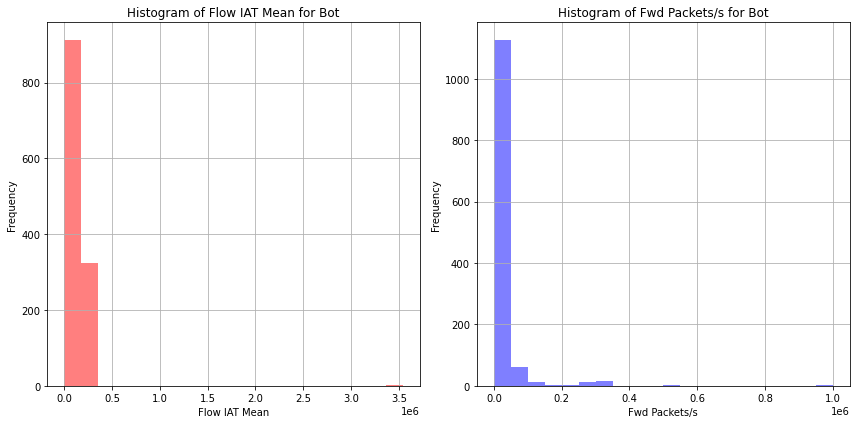

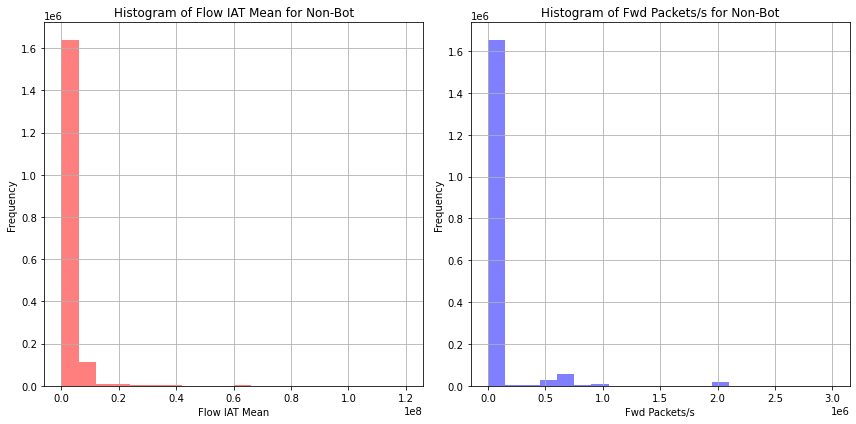

In [55]:
import matplotlib.pyplot as plt

# Find the index for 'Bot'
bot_index = labels_per_group.index('Bot')
print(f"'Bot' is at index {bot_index} in labels_per_group")

# Extract the 'Bot' DataFrame
bot_df = dfs[bot_index]

# Calculate the statistics for 'Flow IAT Mean'
flow_iat_mean_bot = bot_df[' Flow IAT Mean']
print("Statistics for 'Flow IAT Mean' under 'Bot'")
print(f"Mean: {flow_iat_mean_bot.mean()}")
print(f"Max: {flow_iat_mean_bot.max()}")
print(f"Std: {flow_iat_mean_bot.std()}")

# Calculate the statistics for 'Fwd Packets/s'
fwd_packets_per_s_bot = bot_df['Fwd Packets/s']
print("Statistics for 'Fwd Packets/s' under 'Bot'")
print(f"Mean: {fwd_packets_per_s_bot.mean()}")
print(f"Max: {fwd_packets_per_s_bot.max()}")
print(f"Std: {fwd_packets_per_s_bot.std()}")

# For Non-'Bot'
non_bot_dfs = [df for i, df in enumerate(dfs) if i != bot_index]
non_bot_flow_iat_mean = [df[' Flow IAT Mean'] for df in non_bot_dfs]
non_bot_fwd_packets_per_s = [df['Fwd Packets/s'] for df in non_bot_dfs]

# Stats for Non-'Bot'
print("Statistics for Non-'Bot'")
print("For 'Flow IAT Mean'")
print(f"Mean: {[df.mean() for df in non_bot_flow_iat_mean]}")
print(f"Max: {[df.max() for df in non_bot_flow_iat_mean]}")
print(f"Std: {[df.std() for df in non_bot_flow_iat_mean]}")

print("For 'Fwd Packets/s'")
print(f"Mean: {[df.mean() for df in non_bot_fwd_packets_per_s]}")
print(f"Max: {[df.max() for df in non_bot_fwd_packets_per_s]}")
print(f"Std: {[df.std() for df in non_bot_fwd_packets_per_s]}")

# Visualization using Matplotlib
# Bot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(flow_iat_mean_bot, bins=20, alpha=0.5, label='Bot - Flow IAT Mean', color='r')
plt.title('Histogram of Flow IAT Mean for Bot')
plt.xlabel('Flow IAT Mean')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(fwd_packets_per_s_bot, bins=20, alpha=0.5, label='Bot - Fwd Packets/s', color='b')
plt.title('Histogram of Fwd Packets/s for Bot')
plt.xlabel('Fwd Packets/s')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Non-Bot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist([item for sublist in non_bot_flow_iat_mean for item in sublist], bins=20, alpha=0.5, label='Non-Bot - Flow IAT Mean', color='r')
plt.title('Histogram of Flow IAT Mean for Non-Bot')
plt.xlabel('Flow IAT Mean')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([item for sublist in non_bot_fwd_packets_per_s for item in sublist], bins=20, alpha=0.5, label='Non-Bot - Fwd Packets/s', color='b')
plt.title('Histogram of Fwd Packets/s for Non-Bot')
plt.xlabel('Fwd Packets/s')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


### Heuristic Evaluation:

To apply the heuristic `if ['Flow IAT Mean'] < threshold and ['Fwd Packets/s'] > threshold: return 'Bot'`, we'll need to choose appropriate threshold values for `Flow IAT Mean` and `Fwd Packets/s`. Based on the statistics:

- For `Bot` label, the mean of `Flow IAT Mean` is approximately 61,107, and the mean of `Fwd Packets/s` is approximately 21,910.
- For `Non-Bot`, the mean of `Flow IAT Mean` ranges between 24,514 and 14,142,488, and the mean of `Fwd Packets/s` ranges between 8.40 and 180,434.

The heuristic could be effective if we choose a threshold for `Flow IAT Mean` that is greater than 61,107 but less than the minimum mean of `Non-Bot` labels (i.e., 24,514). Likewise, for `Fwd Packets/s`, a threshold greater than 8.40 but less than 21,910 might work.

### Machine Learning Models:

#### 1. Random Forest Classifier

- **Rationale**: Random Forests are great for handling imbalanced classes and can model complex relationships between features.
- **Evaluation**: Given the wide variance in the statistics (both within `Bot` and between `Bot` and `Non-Bot`), a Random Forest model may be able to accurately capture these variances and generalize well.

#### 2. Gradient Boosting Machines (XGBoost, LightGBM)

- **Rationale**: Like Random Forests, these algorithms are also ensemble methods but are known for higher performance and speed.
- **Evaluation**: These models can capture the complex patterns in the data but may be prone to overfitting if not carefully tuned. Considering our data has high variance and potentially many outliers (based on the `Max` and `Std` values), gradient boosting could work well.

#### 3. Support Vector Machines (SVM)

- **Rationale**: SVMs are effective in high-dimensional spaces and can model non-linear relationships via the kernel trick.
- **Evaluation**: The `Std` values are high, which means the data points are spread out over a wide range. If the data isn't linearly separable in the original feature space, the kernel trick could be useful.

#### 4. Logistic Regression

- **Rationale**: This is a simple but effective algorithm for binary classification problems.
- **Evaluation**: Given the high variance and potentially non-linear relationships between features, logistic regression may not be the best model but can serve as a good baseline model.

#### 5. Neural Networks

- **Rationale**: Capable of modeling highly complex relationships between features.
- **Evaluation**: They require a large amount of data and are computationally expensive. The wide variance and large `Max` values in the statistics might make the network susceptible to outliers and overfitting.

#### Prioritization:

1. Random Forest Classifier
2. Gradient Boosting Machines
3. Support Vector Machines
4. Logistic Regression
5. Neural Networks

The Random Forest Classifier is prioritized the highest because it can handle the complexities and imbalances in the dataset while being relatively easier to tune. Gradient Boosting Machines come next for their performance and ability to model complex patterns. SVM is useful for high dimensions but might require more computational effort. Logistic Regression is a good baseline but might be too simple, and Neural Networks come last due to their susceptibility to overfitting and computational costs.


## See how well the following rule works

'Infiltration':
if ['Total Length of Fwd Packets'] > threshold and ['Total Length of Bwd Packets'] > threshold:
    return 'Infiltration'

'Infiltration' is at index 9 in labels_per_group
Statistics for 'Total Length of Fwd Packets' under 'Infiltration'
Mean: 333898.5909090909
Max: 1827335
Std: 615938.5818042373
Statistics for 'Total Length of Bwd Packets' under 'Infiltration'
Mean: 4776.681818181818
Max: 22866
Std: 7976.809885007819
Statistics for Non-'Infiltration'
For 'Total Length of Fwd Packets'
Mean: [628.4507155378931, 2717.592084006462, 31.93803312834755, 415.54040715607647, 282.87495171614614, 489.34699769053117, 818.8863325116406, 59.4936, 14420.333333333334, 1.0935830212234707, 1014.3058696822833, 2289.245521601686, 277.6666666666667, 1421.121951219512]
Max: [1288022, 205731, 62, 6910, 2538, 5720, 3146, 135, 20858, 1473, 3832, 43951, 600, 48985]
Std: [5899.544998591592, 18225.779771668746, 11.976004716877853, 515.662249159252, 267.62670184403936, 1092.9414957674119, 1149.311616938412, 46.30769309227038, 3232.5936129780785, 6.375544548212053, 1007.6277485498973, 9698.299219058885, 290.95120907225333, 8102.912360

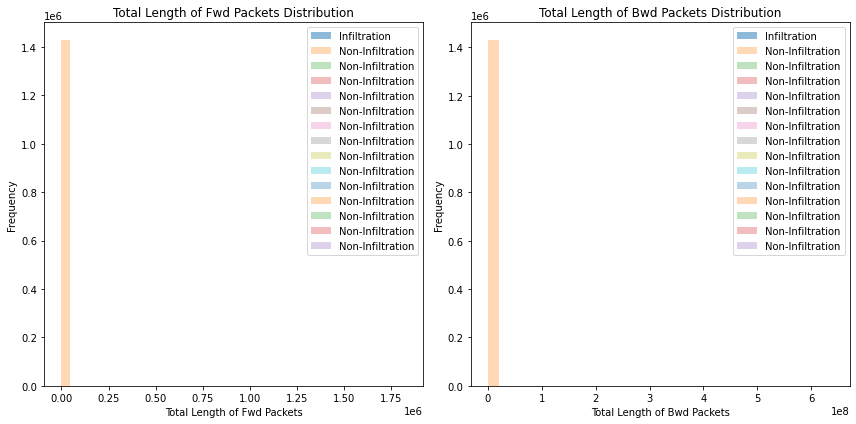

In [56]:
import matplotlib.pyplot as plt

# Find the index for 'Infiltration'
infiltration_index = labels_per_group.index('Infiltration')
print(f"'Infiltration' is at index {infiltration_index} in labels_per_group")

# Extract the 'Infiltration' DataFrame
infiltration_df = dfs[infiltration_index]

# Calculate the statistics for 'Total Length of Fwd Packets'
fwd_packets_length_infiltration = infiltration_df['Total Length of Fwd Packets']
print("Statistics for 'Total Length of Fwd Packets' under 'Infiltration'")
print(f"Mean: {fwd_packets_length_infiltration.mean()}")
print(f"Max: {fwd_packets_length_infiltration.max()}")
print(f"Std: {fwd_packets_length_infiltration.std()}")

# Calculate the statistics for 'Total Length of Bwd Packets'
bwd_packets_length_infiltration = infiltration_df[' Total Length of Bwd Packets']
print("Statistics for 'Total Length of Bwd Packets' under 'Infiltration'")
print(f"Mean: {bwd_packets_length_infiltration.mean()}")
print(f"Max: {bwd_packets_length_infiltration.max()}")
print(f"Std: {bwd_packets_length_infiltration.std()}")

# For Non-'Infiltration'
non_infiltration_dfs = [df for i, df in enumerate(dfs) if i != infiltration_index]
non_infiltration_fwd_packets_length = [df['Total Length of Fwd Packets'] for df in non_infiltration_dfs]
non_infiltration_bwd_packets_length = [df[' Total Length of Bwd Packets'] for df in non_infiltration_dfs]

# Stats for Non-'Infiltration'
print("Statistics for Non-'Infiltration'")
print("For 'Total Length of Fwd Packets'")
print(f"Mean: {[df.mean() for df in non_infiltration_fwd_packets_length]}")
print(f"Max: {[df.max() for df in non_infiltration_fwd_packets_length]}")
print(f"Std: {[df.std() for df in non_infiltration_fwd_packets_length]}")

print("For 'Total Length of Bwd Packets'")
print(f"Mean: {[df.mean() for df in non_infiltration_bwd_packets_length]}")
print(f"Max: {[df.max() for df in non_infiltration_bwd_packets_length]}")
print(f"Std: {[df.std() for df in non_infiltration_bwd_packets_length]}")

# Visualize the data using matplotlib
plt.figure(figsize=(12, 6))

# Plot for 'Total Length of Fwd Packets'
plt.subplot(1, 2, 1)
plt.hist(fwd_packets_length_infiltration, bins=30, alpha=0.5, label='Infiltration')
for df in non_infiltration_fwd_packets_length:
    plt.hist(df, bins=30, alpha=0.3, label='Non-Infiltration')
plt.xlabel('Total Length of Fwd Packets')
plt.ylabel('Frequency')
plt.title('Total Length of Fwd Packets Distribution')
plt.legend()

# Plot for 'Total Length of Bwd Packets'
plt.subplot(1, 2, 2)
plt.hist(bwd_packets_length_infiltration, bins=30, alpha=0.5, label='Infiltration')
for df in non_infiltration_bwd_packets_length:
    plt.hist(df, bins=30, alpha=0.3, label='Non-Infiltration')
plt.xlabel('Total Length of Bwd Packets')
plt.ylabel('Frequency')
plt.title('Total Length of Bwd Packets Distribution')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluating the Heuristic

Based on the statistics for the 'Total Length of Fwd Packets' and 'Total Length of Bwd Packets':

#### For 'Infiltration' attacks:
- Mean of 'Total Length of Fwd Packets': 333898.6
- Max of 'Total Length of Fwd Packets': 1827335
- Std of 'Total Length of Fwd Packets': 615938.6

- Mean of 'Total Length of Bwd Packets': 4776.7
- Max of 'Total Length of Bwd Packets': 22866
- Std of 'Total Length of Bwd Packets': 7976.8

#### For Non-'Infiltration' activities:
- The means for both 'Total Length of Fwd Packets' and 'Total Length of Bwd Packets' are much lower compared to those for 'Infiltration'.
  
A simple heuristic might be to set a threshold based on these statistics. For example, you could set the threshold for 'Total Length of Fwd Packets' to be greater than 600000 and for 'Total Length of Bwd Packets' to be greater than 8000 to identify 'Infiltration'.

However, it's not a guarantee that this heuristic will work for all cases. Therefore, machine learning models might offer a more accurate and reliable solution.

### Machine Learning Models

1. **Random Forest Classifier**
    - **Argument**: Random Forest can capture the complex relationships between the features and labels, and it is known for high accuracy and ability to handle imbalanced datasets.
    - **Evaluation**: Given the variation in the data (as indicated by Std), Random Forest's ensemble approach would likely capture these nuances well.

2. **Gradient Boosting Machines (e.g., XGBoost)**
    - **Argument**: Similar to Random Forest, but generally performs even better albeit at the cost of increased computational intensity.
    - **Evaluation**: Gradient Boosting would be adept at capturing the skewness in the data and providing high accuracy.

3. **Support Vector Machines (SVM)**
    - **Argument**: Effective in high-dimensional spaces and when classes are separable by a hyperplane.
    - **Evaluation**: Given the statistics, it's unclear how well the two classes would be separated in the feature space, but it's worth trying.

4. **Logistic Regression**
    - **Argument**: If the relationship between the feature and the label is somewhat linear, logistic regression could work quite well and it's easy to interpret.
    - **Evaluation**: Given the high Std and max values, the data may not be linear, but it is quick to implement and test.

5. **Neural Networks**
    - **Argument**: Can model complex non-linear relationships.
    - **Evaluation**: Neural Networks may be overkill for this kind of problem, especially given the risk of overfitting and the computational resources needed.

Based on your statistics, I would prioritize Random Forest and Gradient Boosting Machines because they can handle a wide range of data distributions and are less likely to overfit compared to a deep neural network.

## See how well the following rule works

'Heartbleed':
if ['Destination Port'] == 443 and ['Fwd Packet Length Max'] > threshold:
    return 'Heartbleed'


'Heartbleed' is at index 8 in labels_per_group
Statistics for 'Fwd Packet Length Max' under 'Heartbleed'
Mean: 5309.333333333333
Max: 5792
Std: 747.7439847077786
Statistics for Non-'Heartbleed'
For 'Fwd Packet Length Max'
Mean: [230.6553349304018, 408.7205169628433, 14.932255504860146, 311.76727328809375, 233.66139223043814, 235.63481524249423, 94.67981374965763, 18.9382, 1023.1363636363636, 1.0695330836454433, 323.50242326332796, 54.9072708113804, 277.6666666666667, 22.28048780487805]
Max: [24820, 23360, 20, 791, 423, 1983, 410, 49, 1460, 397, 1432, 602, 600, 585]
Std: [791.7018215043946, 2271.518192395181, 6.728071781624097, 199.62902808262837, 164.22856224473418, 427.33344976254864, 111.5918255736925, 5.572198007799761, 409.2625534572369, 3.629565217016018, 321.0237363319064, 165.9429831921441, 290.95120907225333, 110.90248523831782]


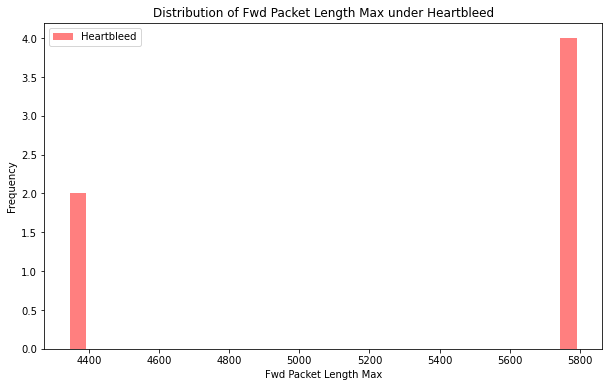

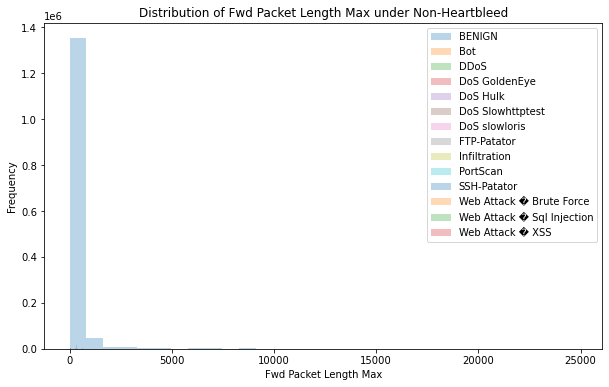

In [58]:
# Find the index for 'Heartbleed'
heartbleed_index = labels_per_group.index('Heartbleed')
print(f"'Heartbleed' is at index {heartbleed_index} in labels_per_group")

# Extract the 'Heartbleed' DataFrame
heartbleed_df = dfs[heartbleed_index]

# Filter and calculate statistics for 'Destination Port' and 'Fwd Packet Length Max'
destination_port_heartbleed = heartbleed_df[' Destination Port']
fwd_pkt_len_max_heartbleed = heartbleed_df[' Fwd Packet Length Max']

# We will only look at statistics for 'Fwd Packet Length Max' as 'Destination Port' is constant in this case
print("Statistics for 'Fwd Packet Length Max' under 'Heartbleed'")
print(f"Mean: {fwd_pkt_len_max_heartbleed.mean()}")
print(f"Max: {fwd_pkt_len_max_heartbleed.max()}")
print(f"Std: {fwd_pkt_len_max_heartbleed.std()}")

# For Non-'Heartbleed'
non_heartbleed_dfs = [df for i, df in enumerate(dfs) if i != heartbleed_index]
non_heartbleed_fwd_pkt_len_max = [df[' Fwd Packet Length Max'] for df in non_heartbleed_dfs]

# Stats for Non-'Heartbleed'
print("Statistics for Non-'Heartbleed'")
print("For 'Fwd Packet Length Max'")
print(f"Mean: {[df.mean() for df in non_heartbleed_fwd_pkt_len_max]}")
print(f"Max: {[df.max() for df in non_heartbleed_fwd_pkt_len_max]}")
print(f"Std: {[df.std() for df in non_heartbleed_fwd_pkt_len_max]}")

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Histogram for 'Fwd Packet Length Max' under 'Heartbleed'
plt.figure(figsize=(10, 6))
plt.hist(fwd_pkt_len_max_heartbleed, bins=30, alpha=0.5, color='r', label='Heartbleed')
plt.xlabel('Fwd Packet Length Max')
plt.ylabel('Frequency')
plt.title('Distribution of Fwd Packet Length Max under Heartbleed')
plt.legend()
plt.show()

# Histogram for 'Fwd Packet Length Max' under Non-'Heartbleed'
plt.figure(figsize=(10, 6))
for i, df in enumerate(non_heartbleed_fwd_pkt_len_max):
    label = labels_per_group[i] if i < heartbleed_index else labels_per_group[i + 1]  # Skip the index corresponding to 'Heartbleed'
    plt.hist(df, bins=30, alpha=0.3, label=label)
plt.xlabel('Fwd Packet Length Max')
plt.ylabel('Frequency')
plt.title('Distribution of Fwd Packet Length Max under Non-Heartbleed')
plt.legend()
plt.show()


### Evaluating the Heuristic:

Given the output:

- The mean value of 'Fwd Packet Length Max' for 'Heartbleed' attacks is about 5309.33, with a standard deviation of about 747.74.
- The mean values for 'Fwd Packet Length Max' for Non-'Heartbleed' vary significantly, ranging from as low as 1.06 to as high as 1023.14.

One can tentatively say that a threshold value somewhere between 1023 and 5309 may be an effective delimiter. However, without more information on the data distribution and overlapping values, it is hard to set a precise threshold confidently.

### Machine Learning Models:

1. **Random Forest Classifier**: 
    - **Argument**: This ensemble method is highly interpretable and can handle a mix of numerical and categorical features. It can also capture non-linear relationships.
    - **Evaluation**: Given the large spread in 'Fwd Packet Length Max' across various labels (std ranges from 3.6 to 2271.5), a Random Forest could work well in capturing this complex distribution.

2. **Gradient Boosting Machines (XGBoost, LightGBM)**:
    - **Argument**: These algorithms are known for high performance and can optimize on a given evaluation metric, which could be crucial for imbalanced classes.
    - **Evaluation**: Similar to Random Forests, but generally performs even better though at the cost of interpretability.

3. **Support Vector Machines (SVM)**:
    - **Argument**: Effective in high-dimensional spaces and best suited for problems with complex decision boundaries.
    - **Evaluation**: Could be computationally expensive but may perform well given the range and standard deviation in the features.

4. **Logistic Regression**:
    - **Argument**: Provides good interpretability and works well if the relationship between the independent and dependent variables is approximately linear.
    - **Evaluation**: Might be too simple to capture all the nuances in the data but could be used as a baseline model.

5. **Neural Networks**:
    - **Argument**: Can model highly complex relationships.
    - **Evaluation**: May require a large amount of data and could overfit or be hard to interpret.

6. **K-Nearest Neighbors (K-NN)**:
    - **Argument**: Makes decisions based on the entire dataset and can capture non-linear decision boundaries.
    - **Evaluation**: Given that the 'Fwd Packet Length Max' feature values have a wide range, normalization and distance metrics would be crucial for K-NN. 

### Prioritization:

1. **Random Forest Classifier**: Given its balance of performance and interpretability, it's often a good starting point.
2. **Gradient Boosting Machines**: For performance optimization.
3. **SVM**: If computational complexity is not an issue.
4. **Logistic Regression**: For a simpler, baseline model.
5. **Neural Networks**: If the above methods are insufficient and more data is available.
6. **K-NN**: Least preferred due to its sensitivity to feature scales and the potential for high computational cost.

The best choice would depend on the specific needs of the project, including computational resources, the importance of interpretability, and performance requirements.